In [1]:
# importing library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
credit_card = pd.read_csv('creditcard.csv')

In [ ]:
DATA Anaysis

In Data analysis , we will Analyze to find out the below points:

1. Categorical Variables
2. Cardinality of Categorical Variables
3. Missing Values
4. Univariante analysis of all the numerical Variables
5. Distribution of the numerical Variables
6. Features Corelation
7. Outliers
8. Relationship between independent and dependent features

In [3]:
# print shape of dataset with rowa & columns

print(credit_card.shape)

(284807, 31)


In [4]:
# print top 5 records
credit_card.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
# print full summary

credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
categorical_features=[features for features in credit_card.columns if credit_card[features].dtypes=="0" or credit_card[features].dtypes=="int64"]
print(categorical_features)

['Class']


In [7]:
discrete_feature=[feature for feature in credit_card.columns if len(credit_card[feature].unique())<25 and feature not in ['class']]
print("Discrete Variables Count:{}".format(len(discrete_feature)))

Discrete Variables Count:1


In [8]:
# step make the list of features which has missing values
features_with_na=[features for features in credit_card.columns if credit_card[features].isnull().sum()>1]
# print the missing features list              
print(len(features_with_na))

0


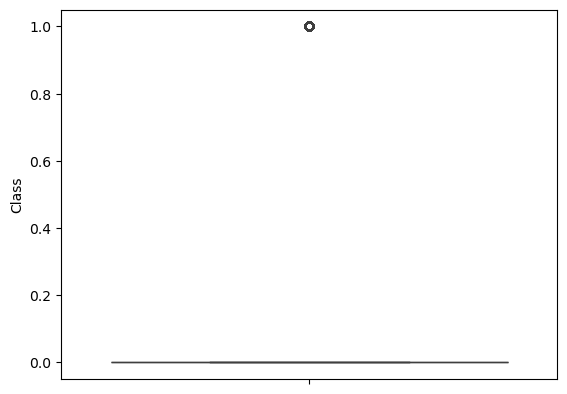

percent of fraud transaction: 0.1727485630620034 %
percent of normal transaction: 99.82725143693798 %


In [9]:
# DATA UNBALANCE
sns.boxplot(credit_card['Class'])
plt.show()
print('percent of fraud transaction:',len(credit_card[credit_card['Class']==1])/len(credit_card['Class'])*100,"%")
print('percent of normal transaction:',len(credit_card[credit_card['Class']==0])/len(credit_card['Class'])*100,"%")

In [10]:
import matplotlib.pyplot as plt

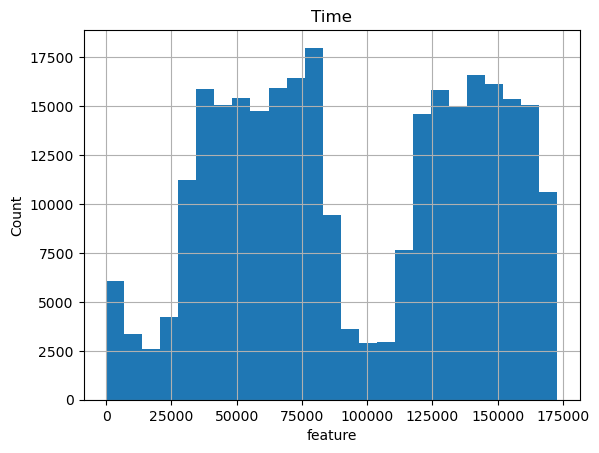

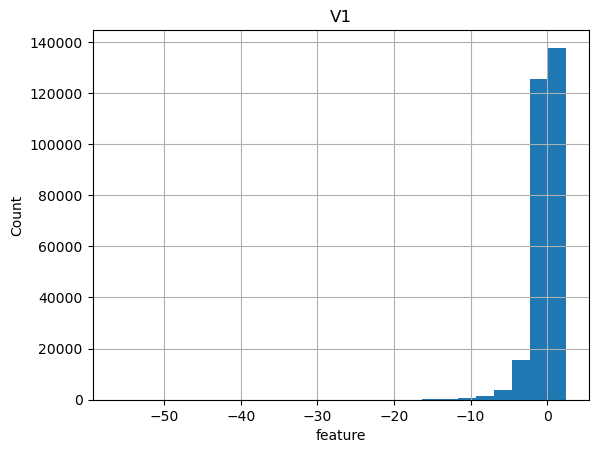

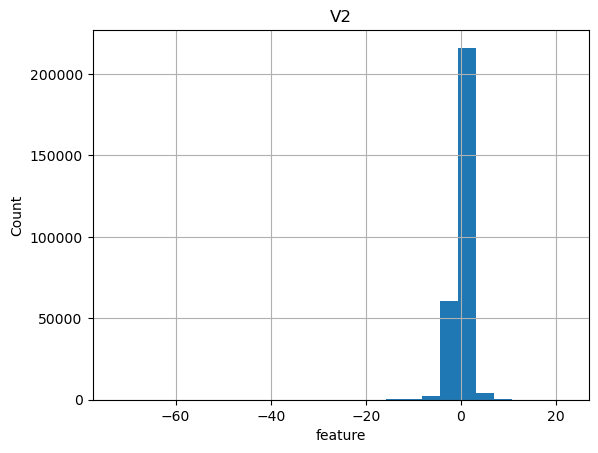

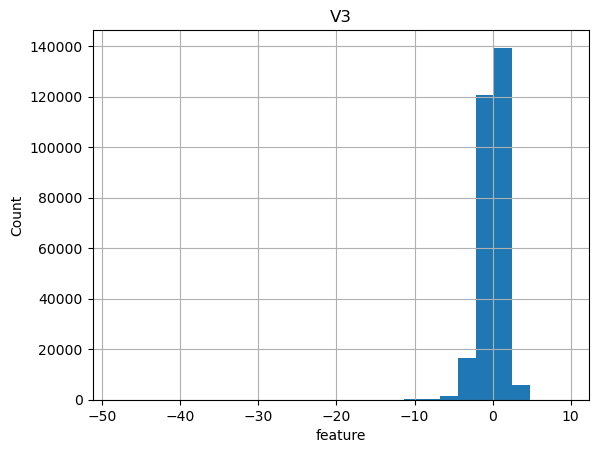

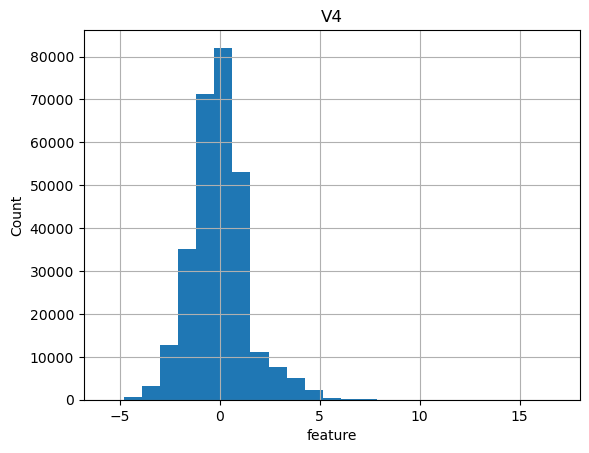

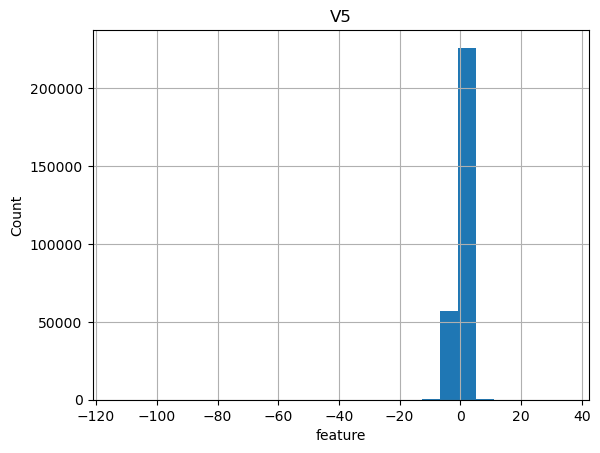

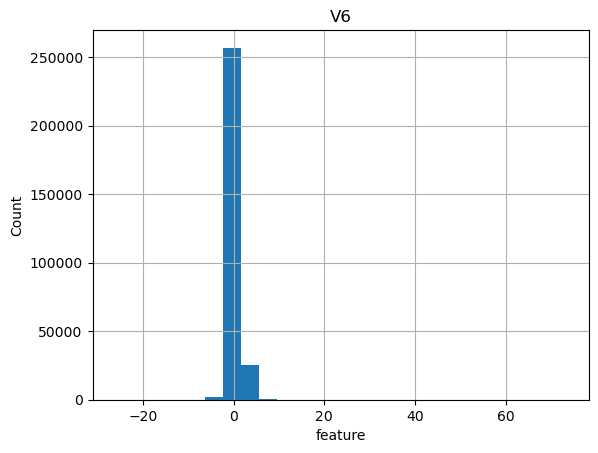

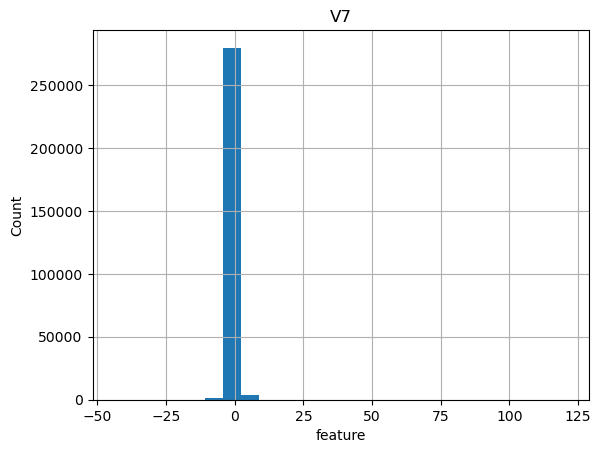

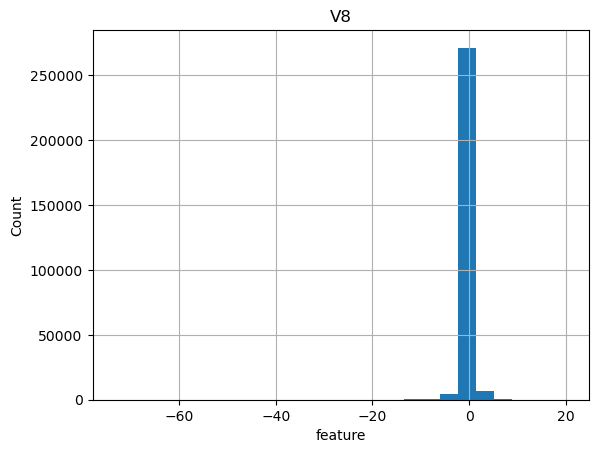

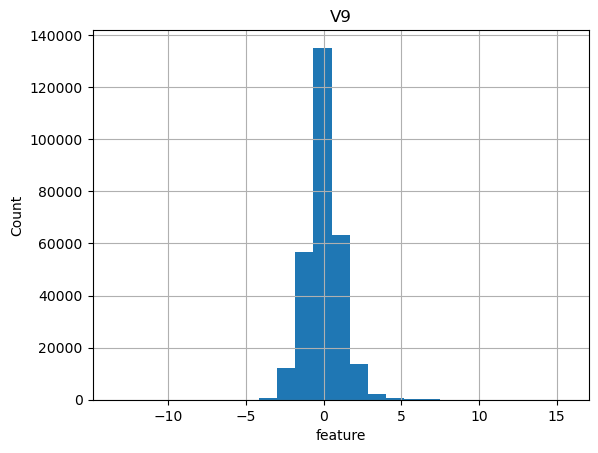

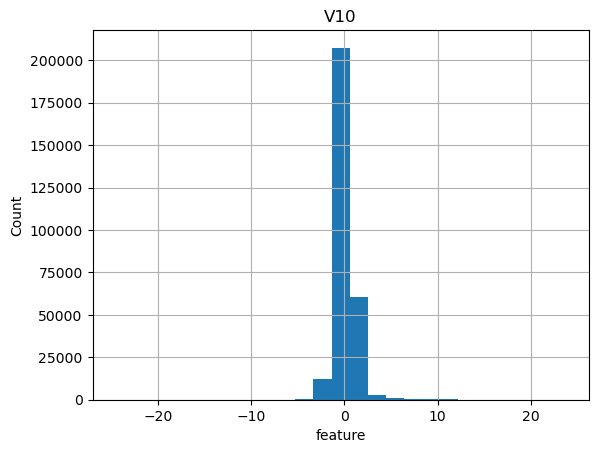

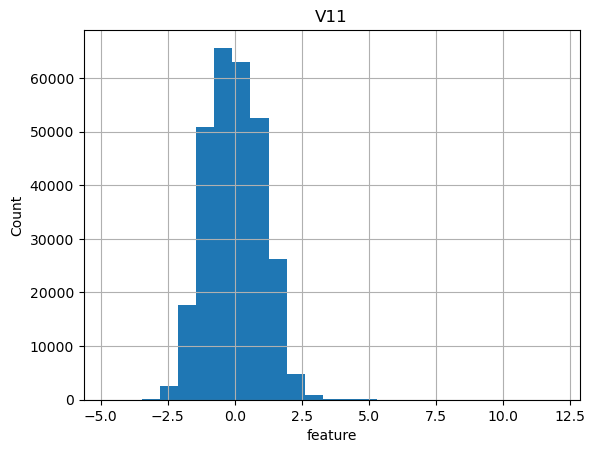

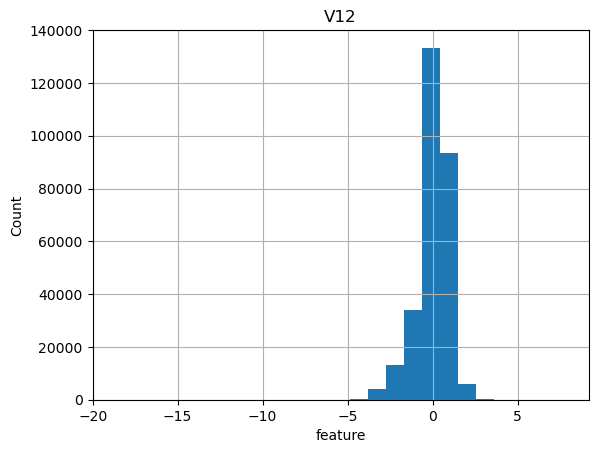

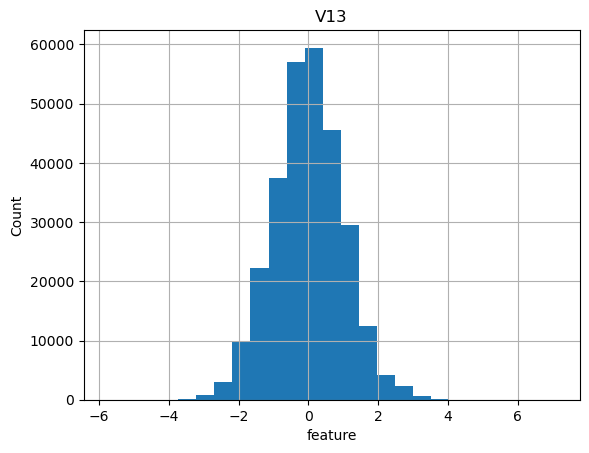

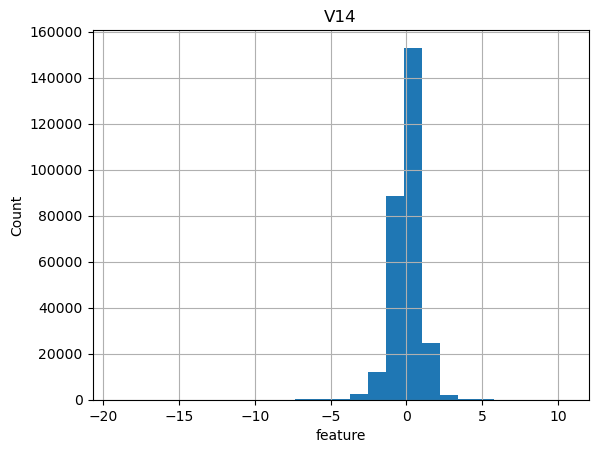

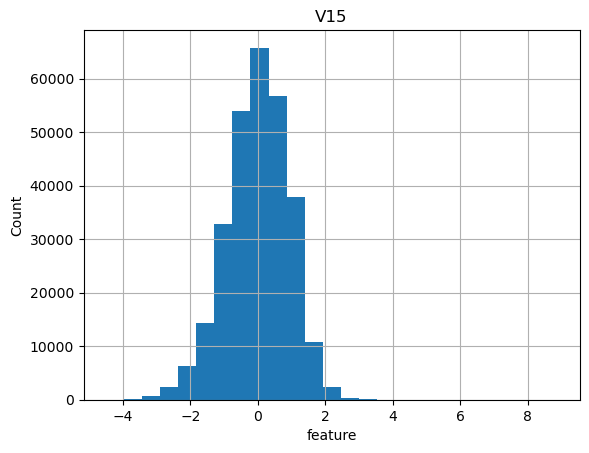

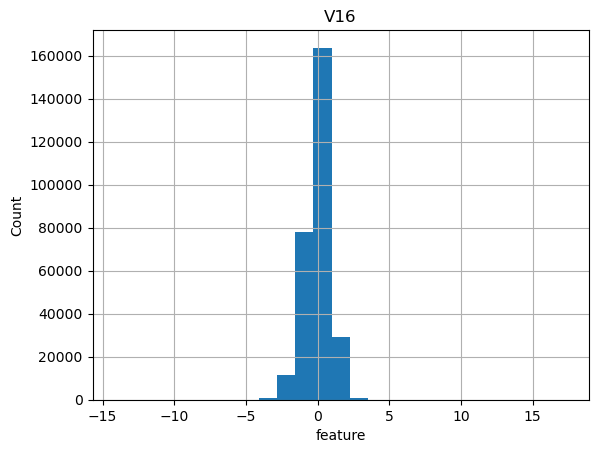

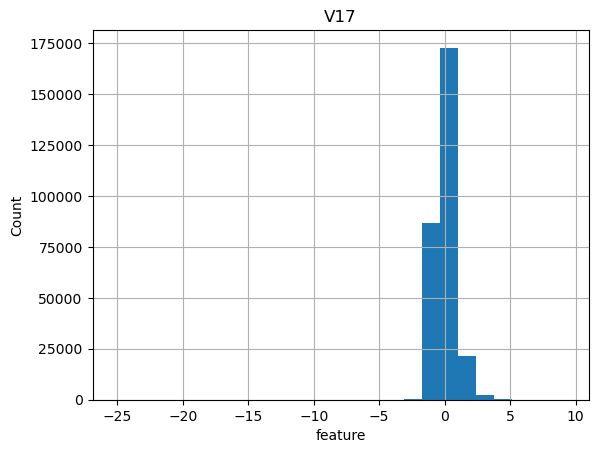

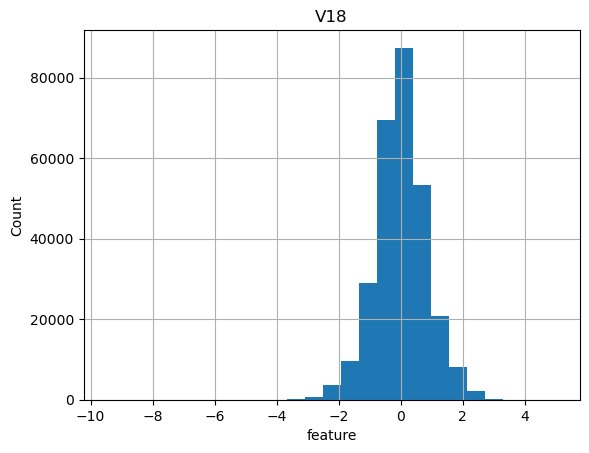

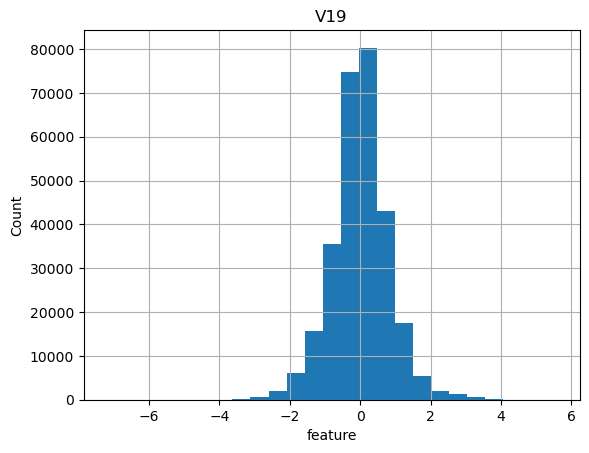

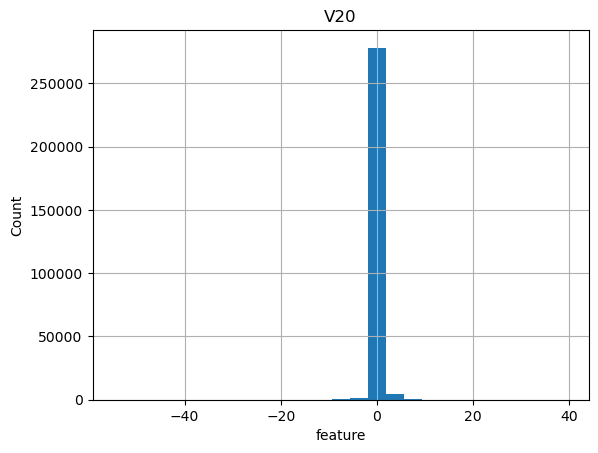

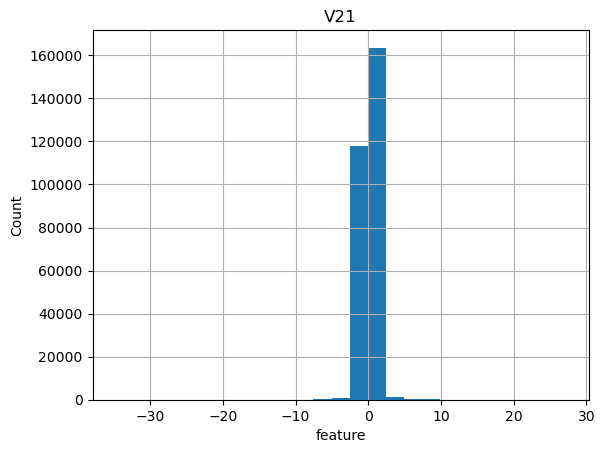

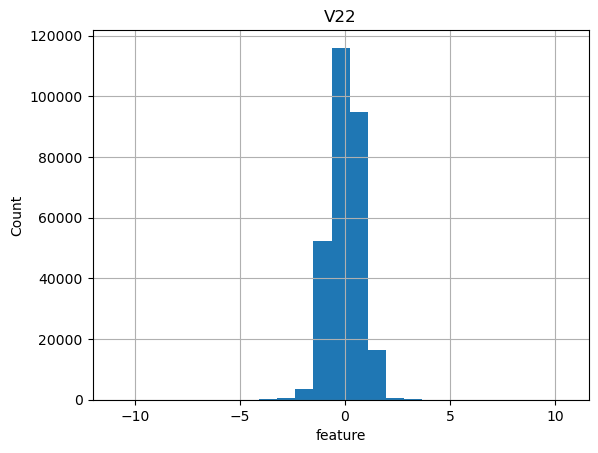

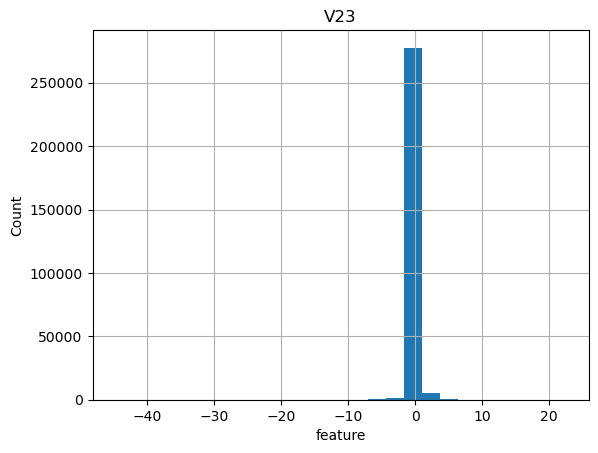

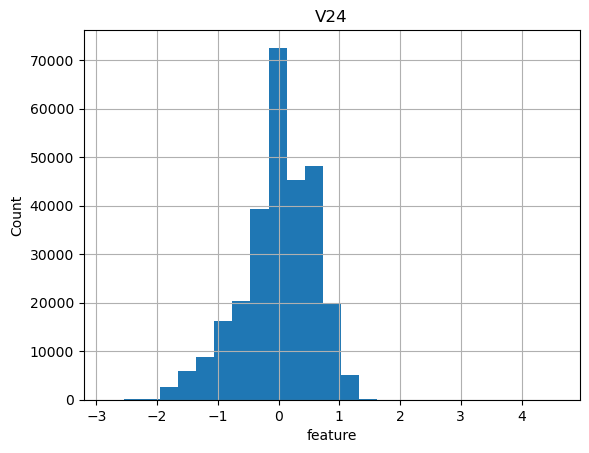

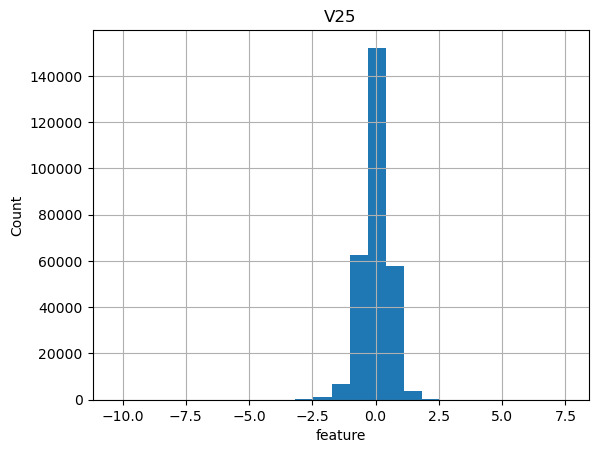

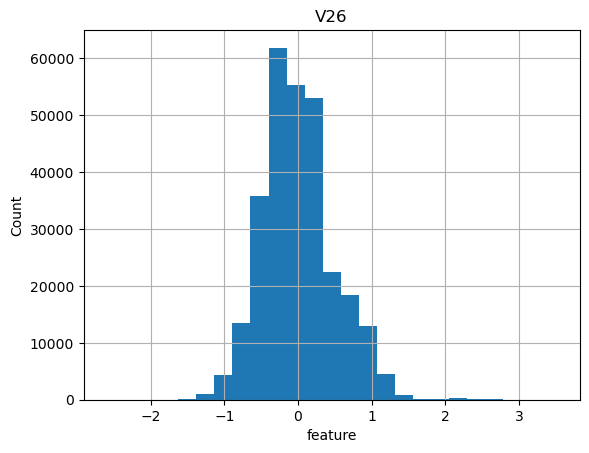

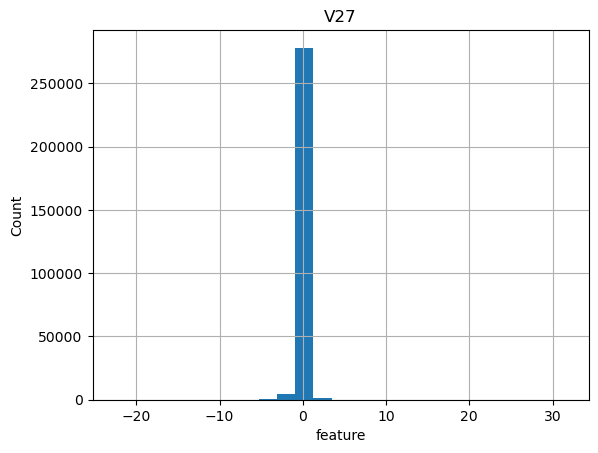

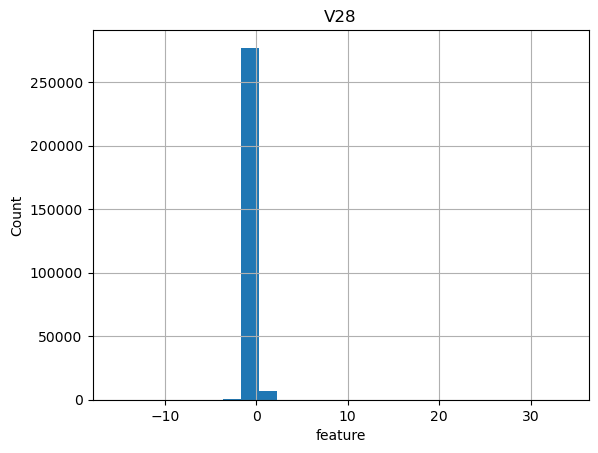

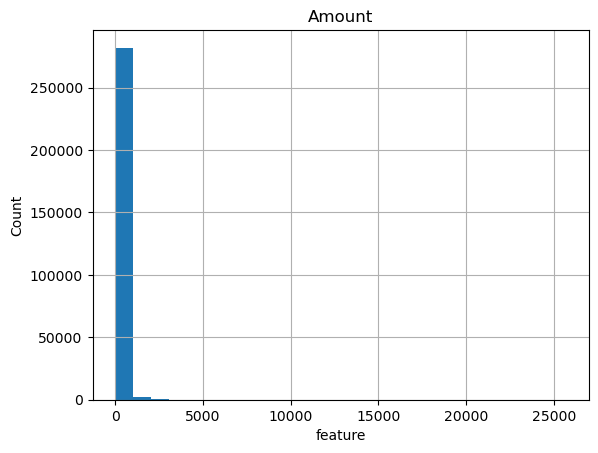

In [11]:
# lets analyse the continuous values by creating histograms to understand the distribution
data=credit_card.copy()
data.drop(columns="Class",inplace = True)

for feature in data.columns:
    credit_card[feature].hist(bins=25)
    plt.xlabel('feature')
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

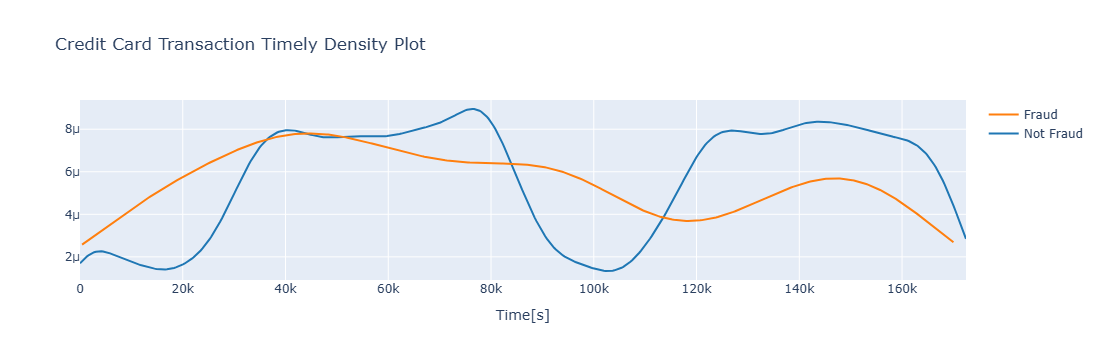

In [12]:
#figure factory module contains dedicated functions for creating very specific types of plots

import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
class_0 = credit_card.loc[credit_card['Class']==0]["Time"]
class_1 = credit_card.loc[credit_card['Class']==1]["Time"]
hist_data = [class_0,class_1]
group_labels = ["Not Fraud","Fraud"]

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transaction Timely Density Plot', xaxis=dict(title='Time[s]'))
iplot(fig,filename='dist_only')

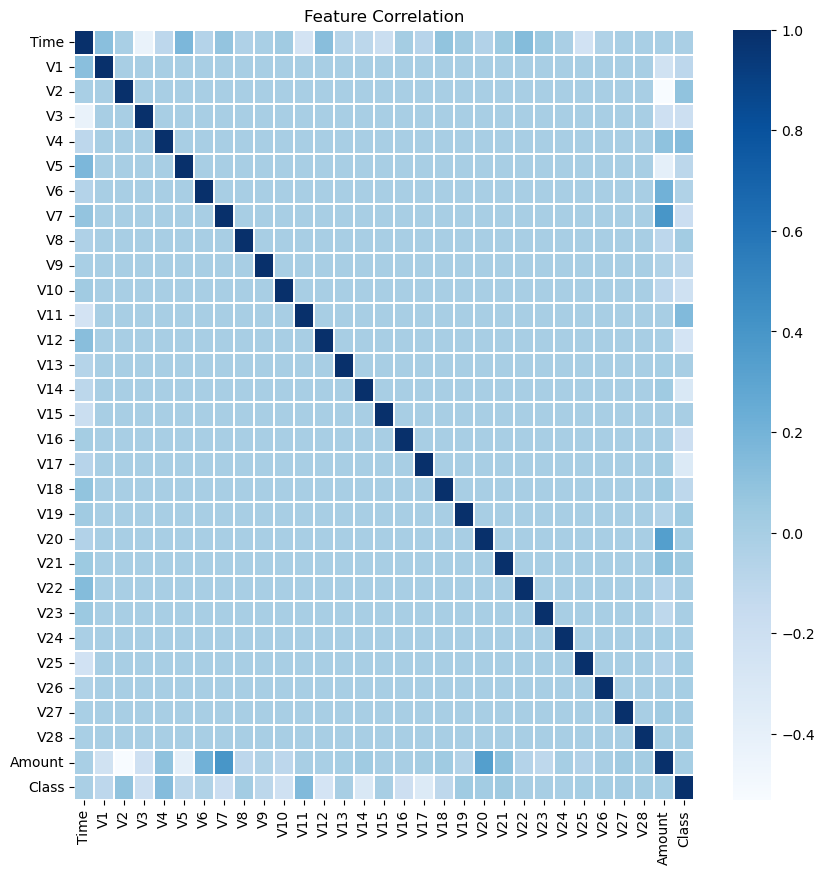

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,10))
plt.title('Feature Correlation')
corr = credit_card.corr()
sns.heatmap(corr,xticklabels=corr.columns,  yticklabels=corr.columns, linewidths=.1, cmap="Blues")
plt.show()

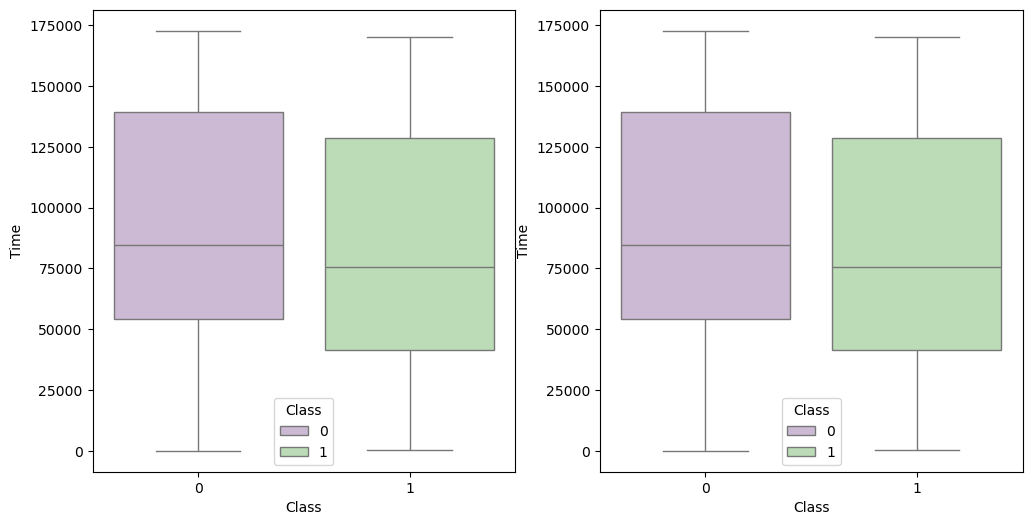

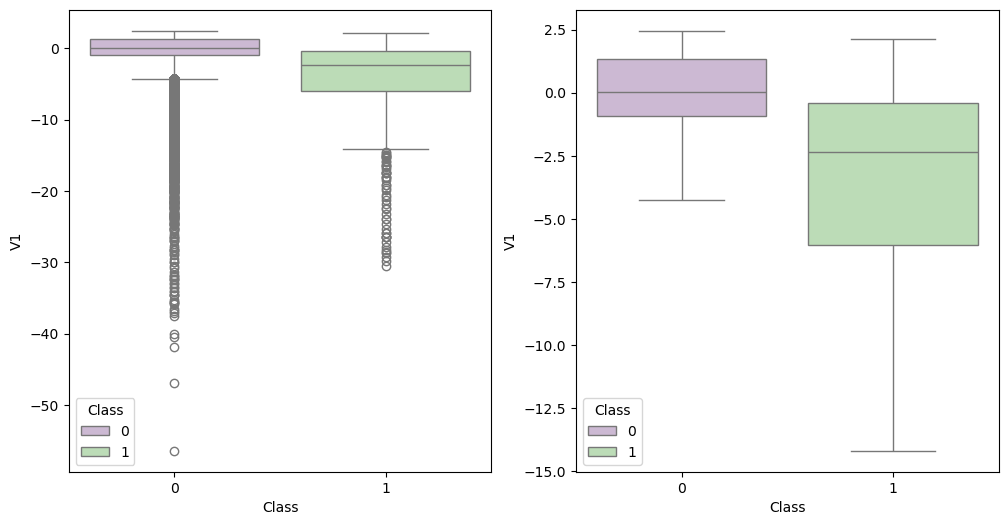

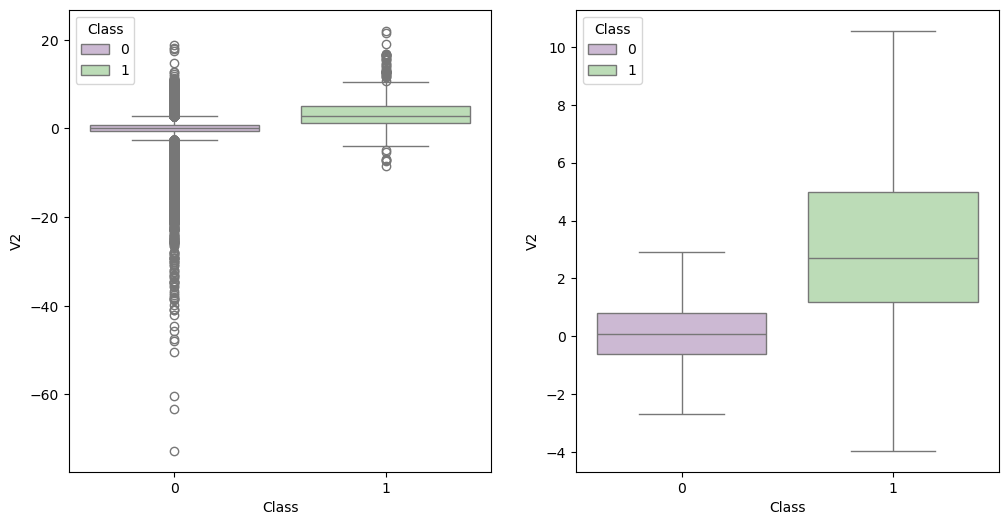

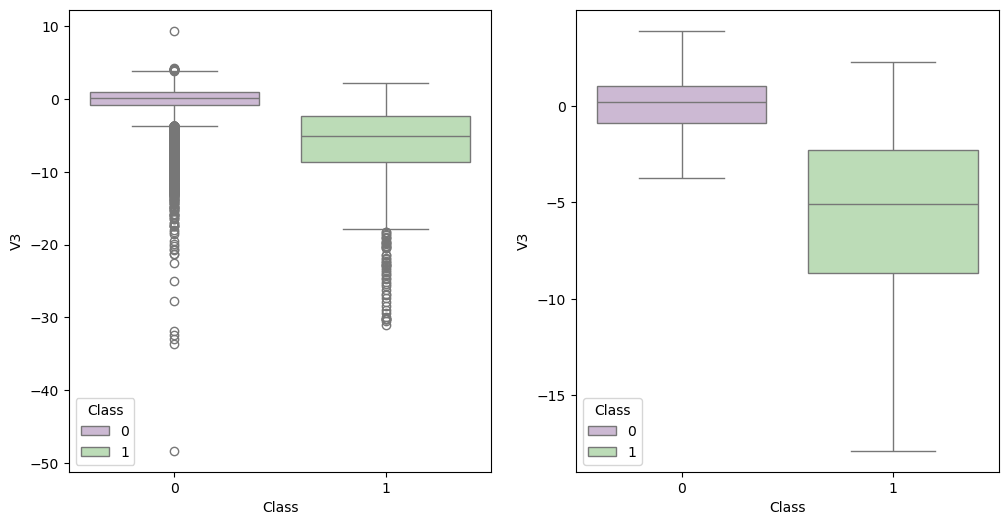

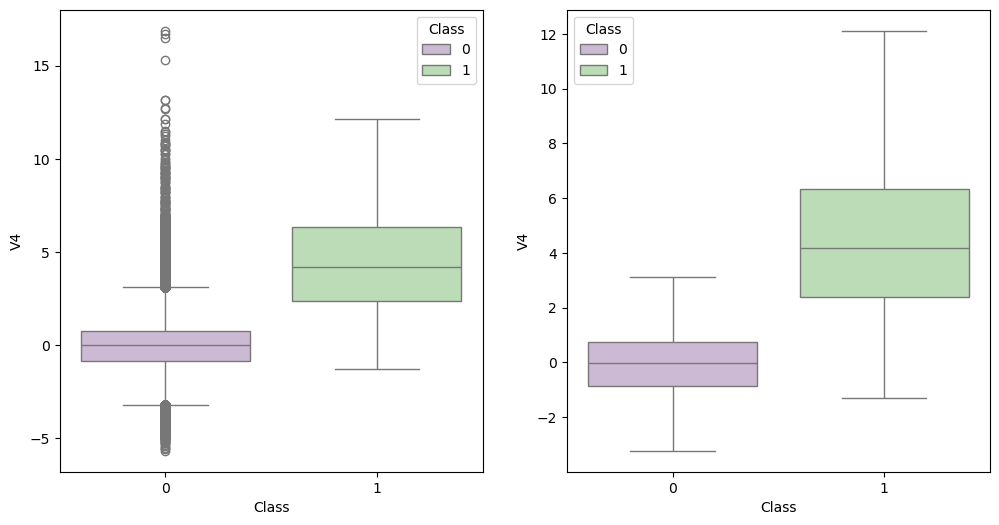

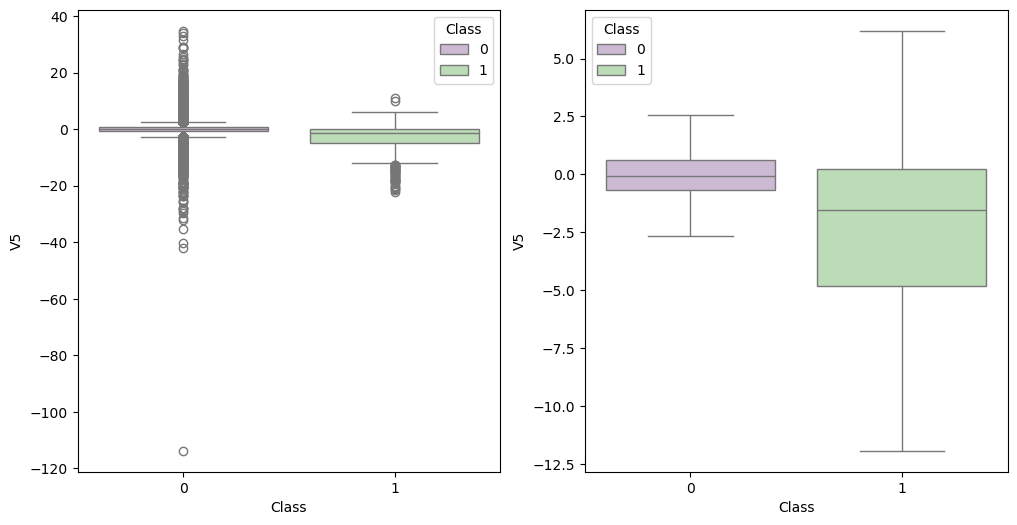

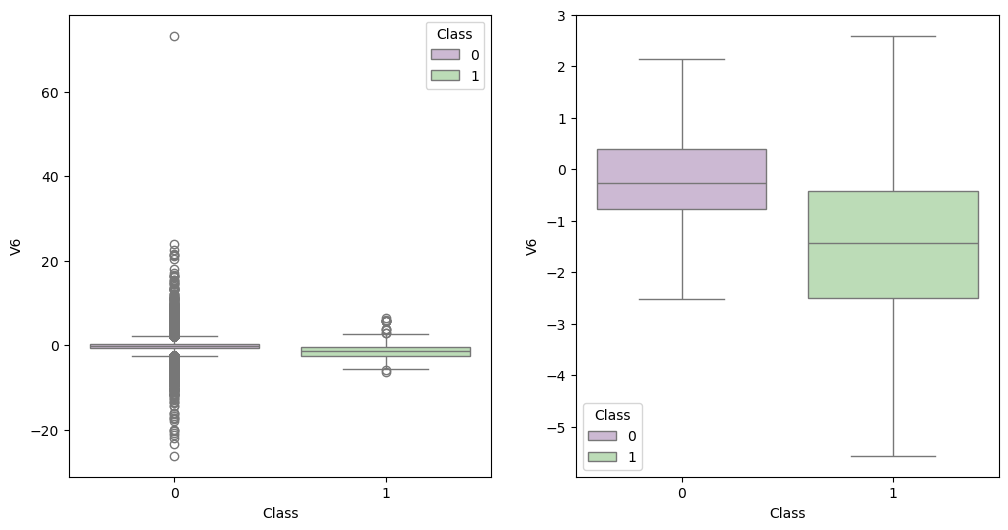

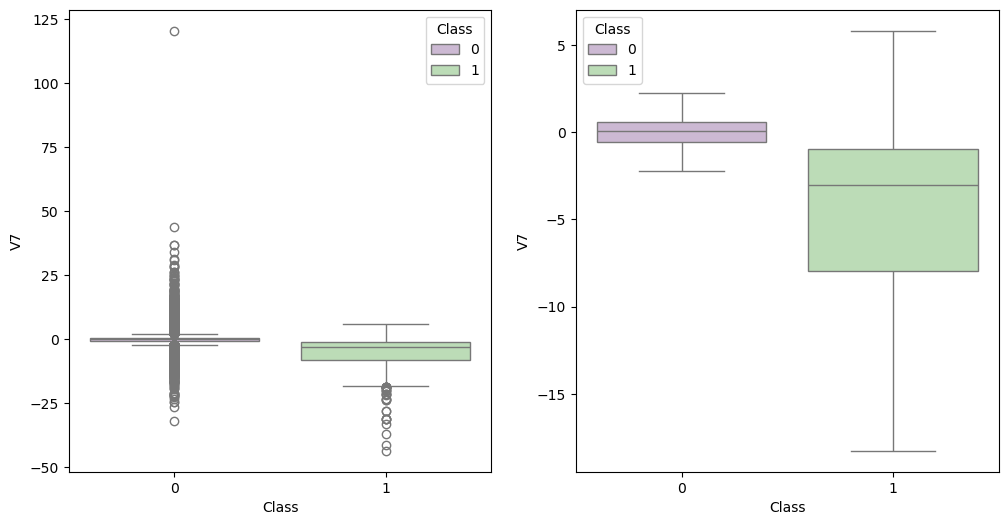

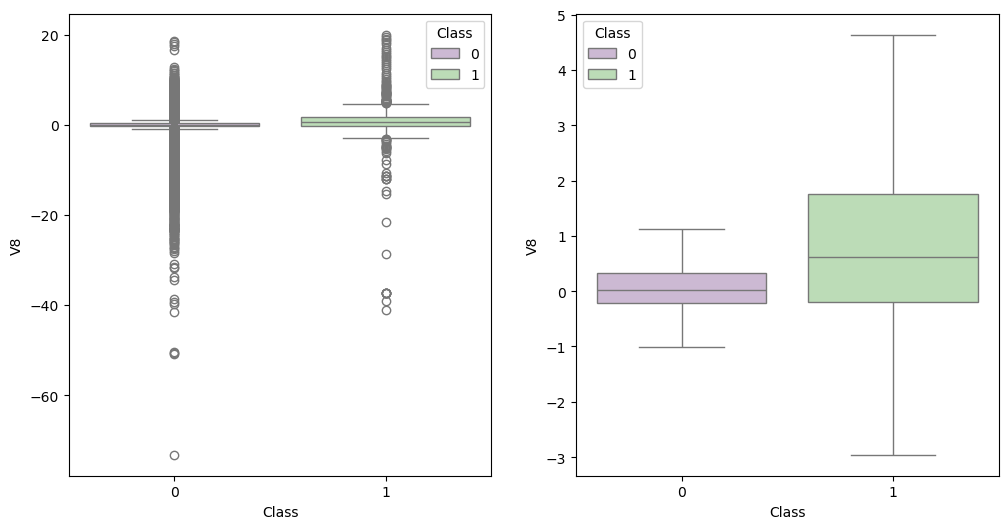

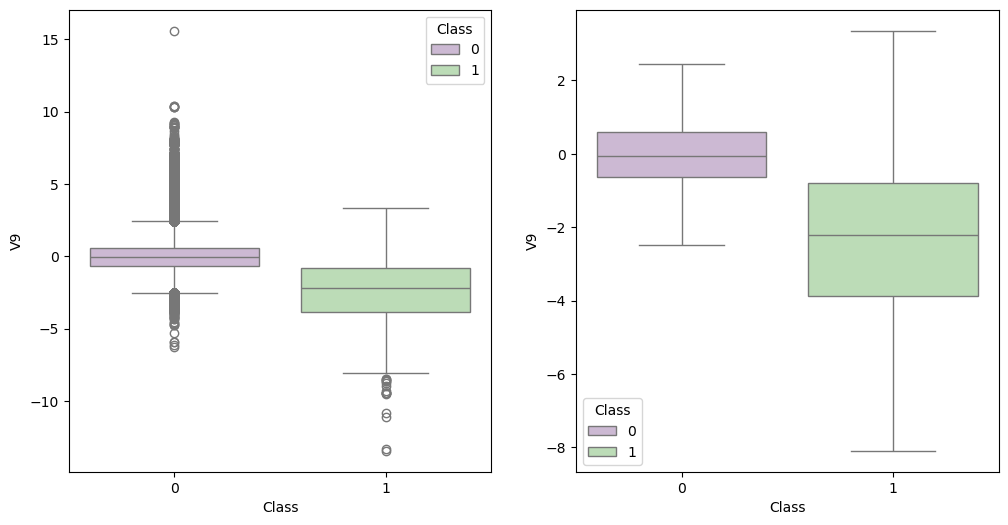

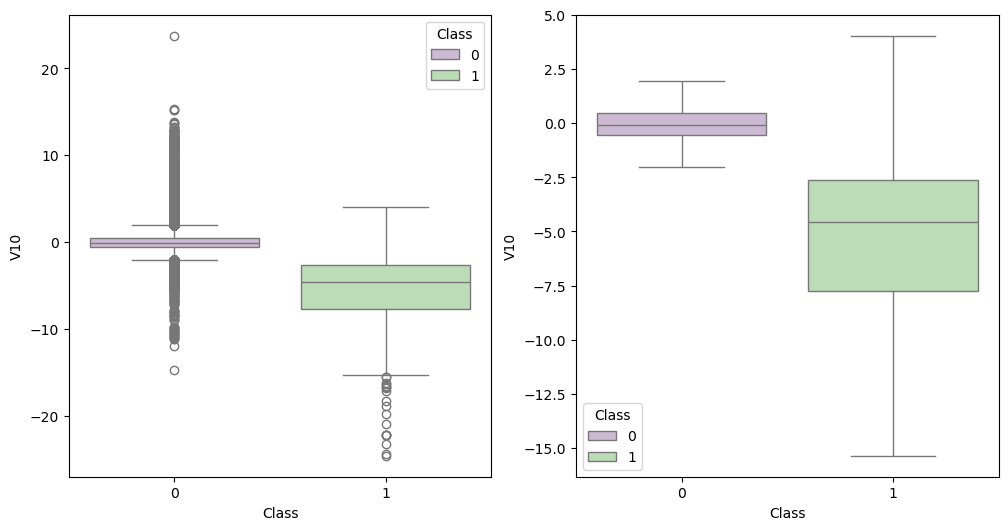

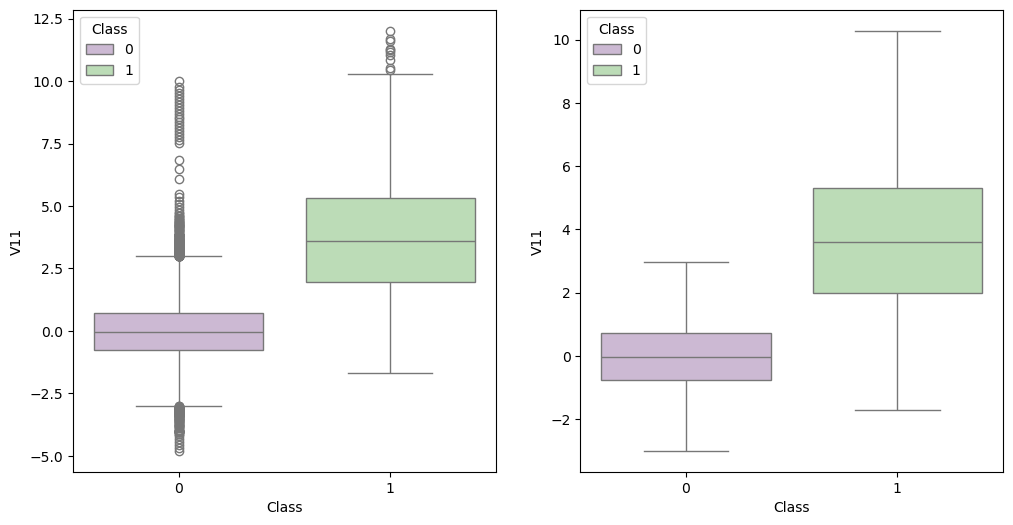

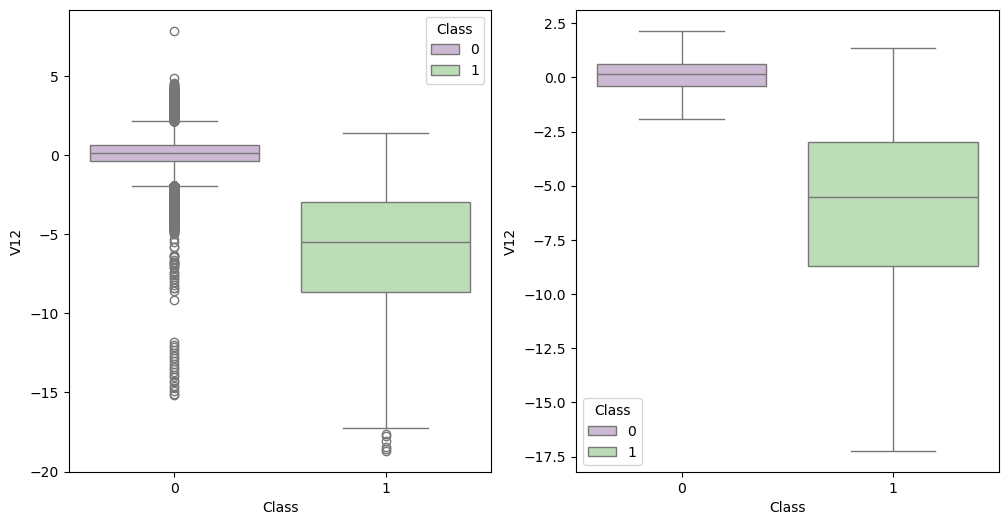

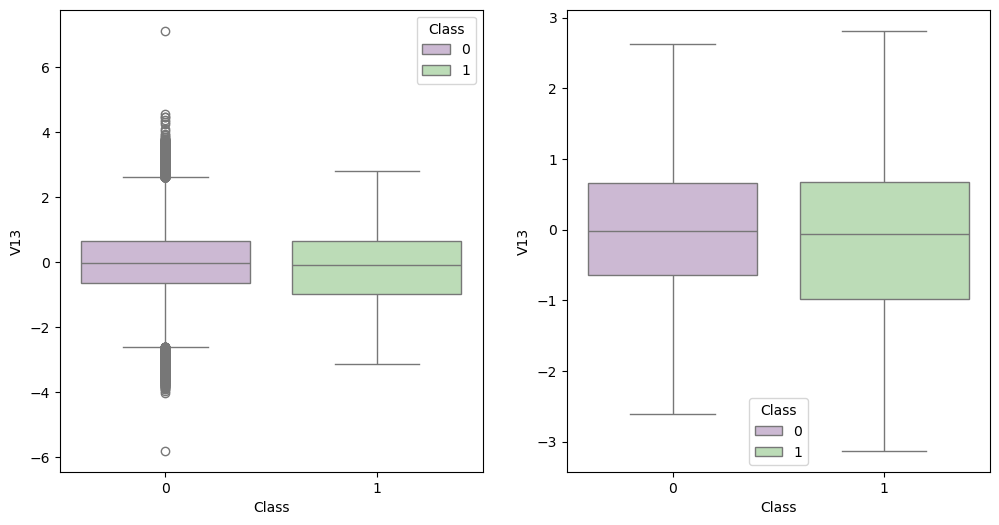

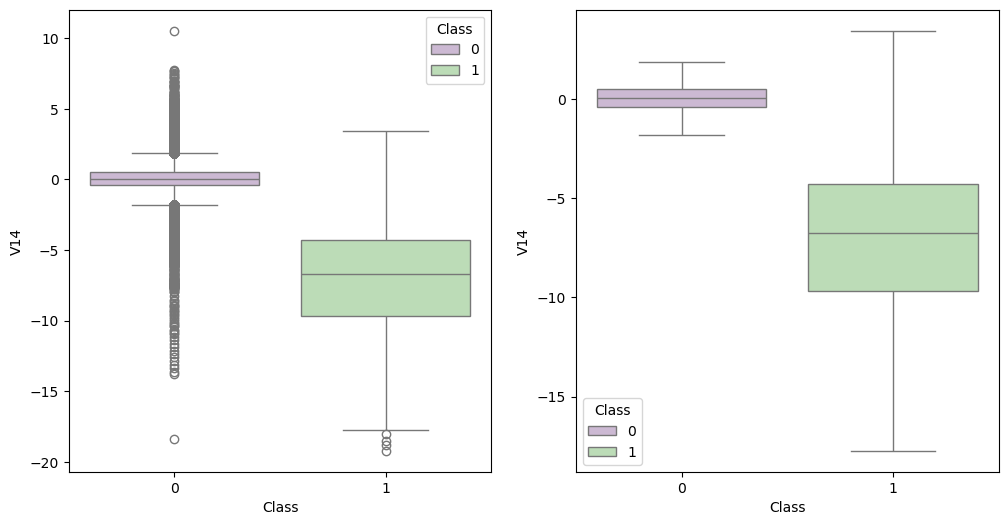

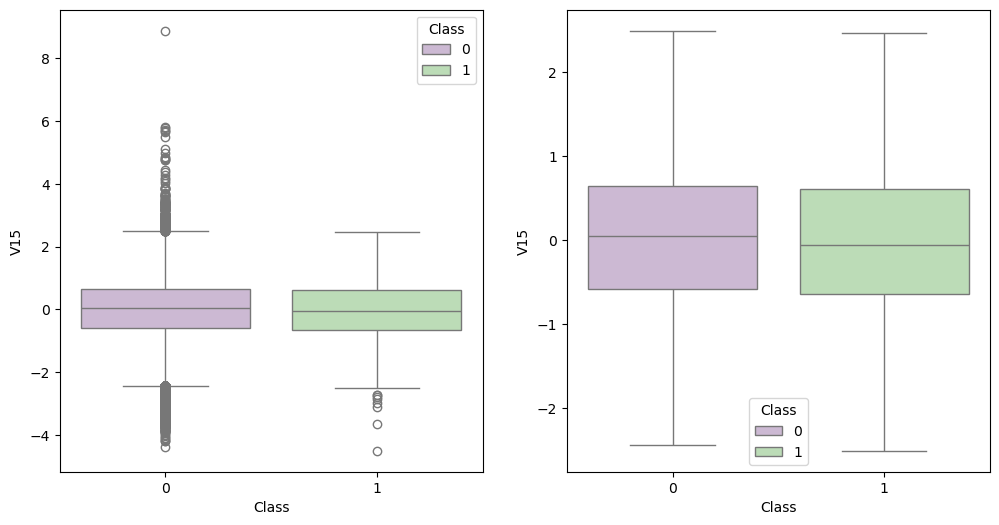

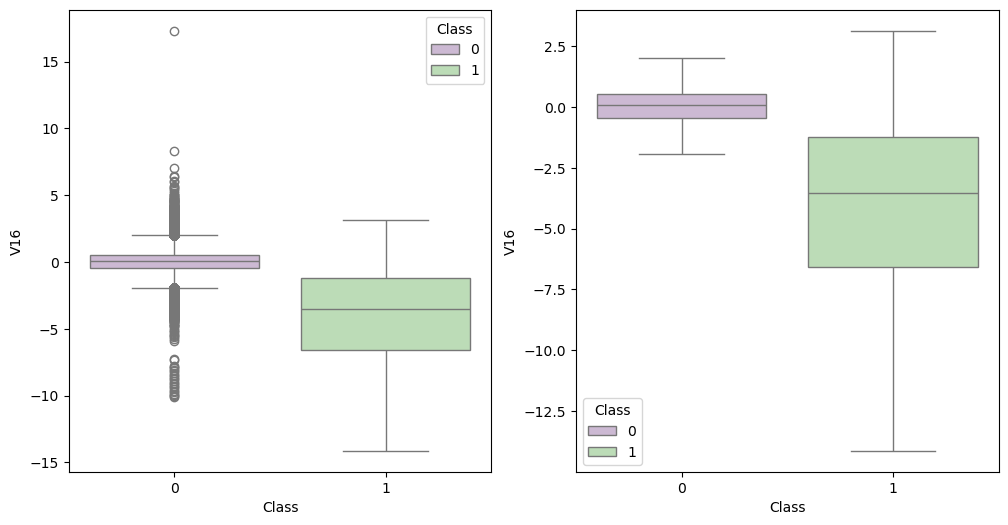

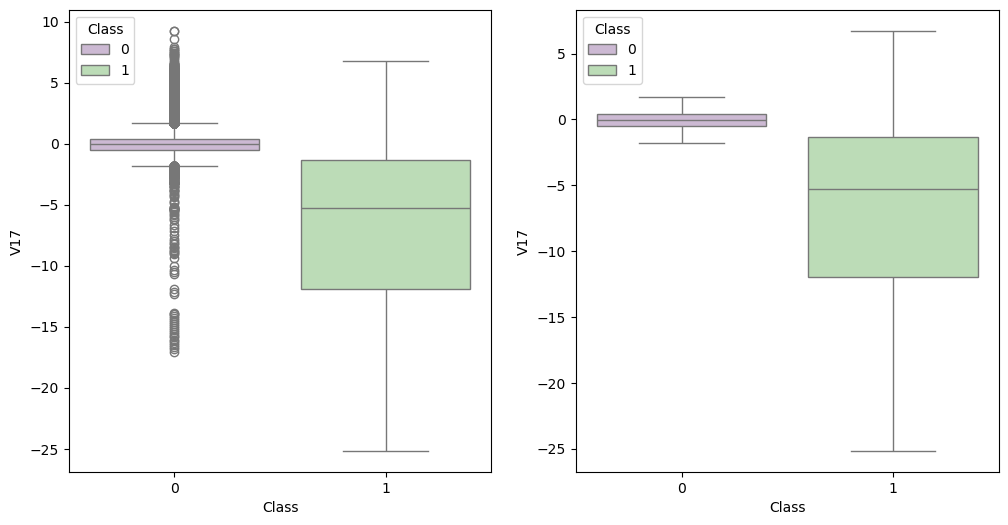

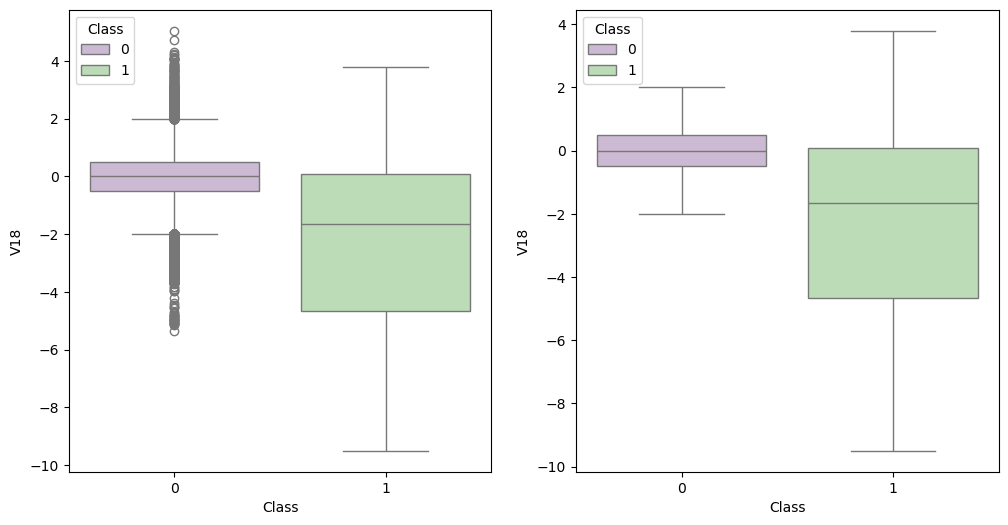

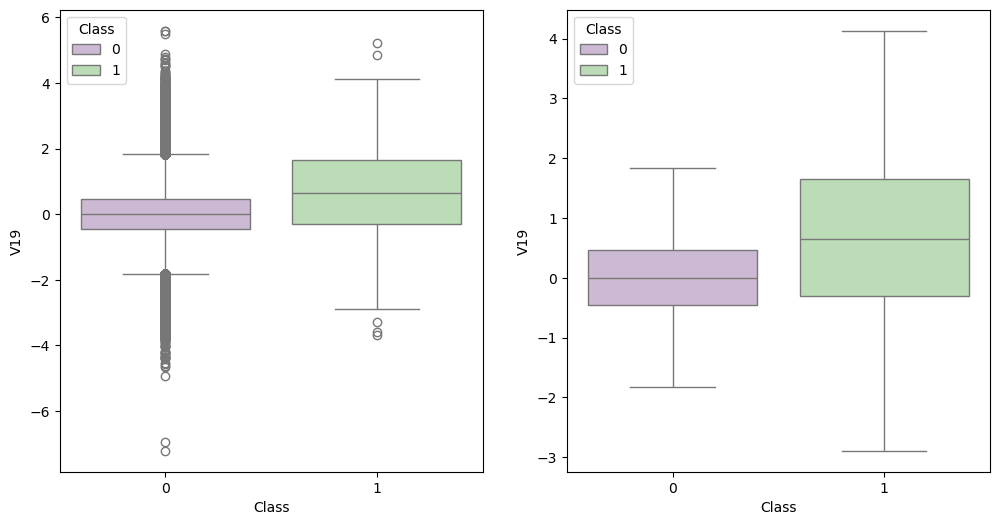

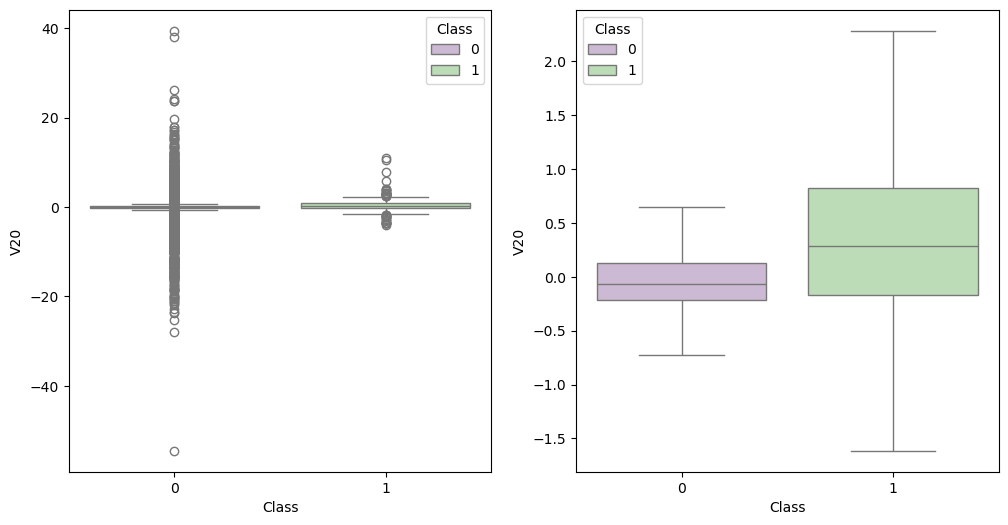

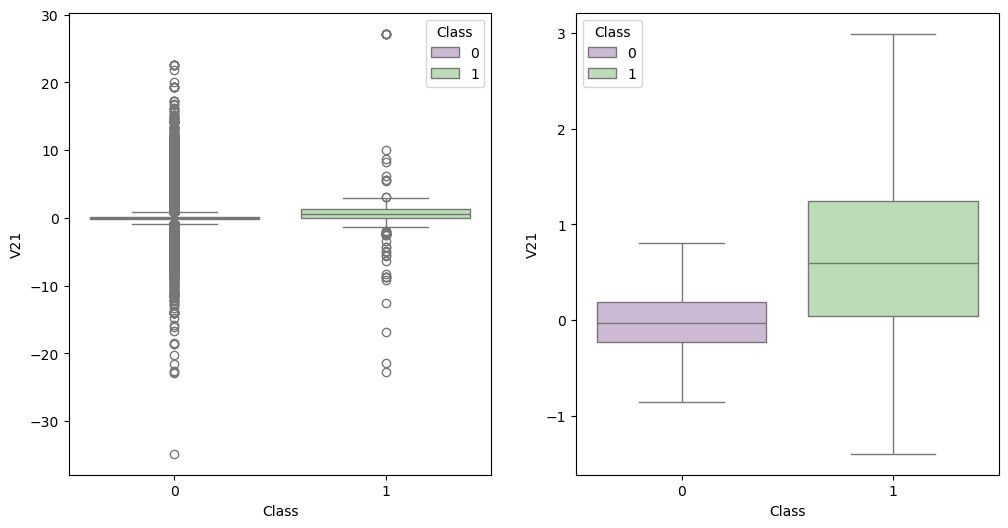

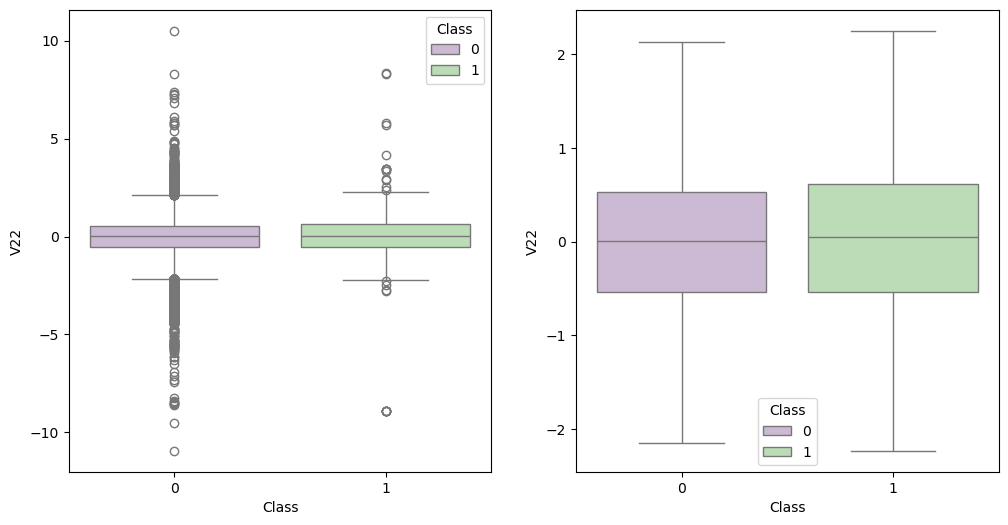

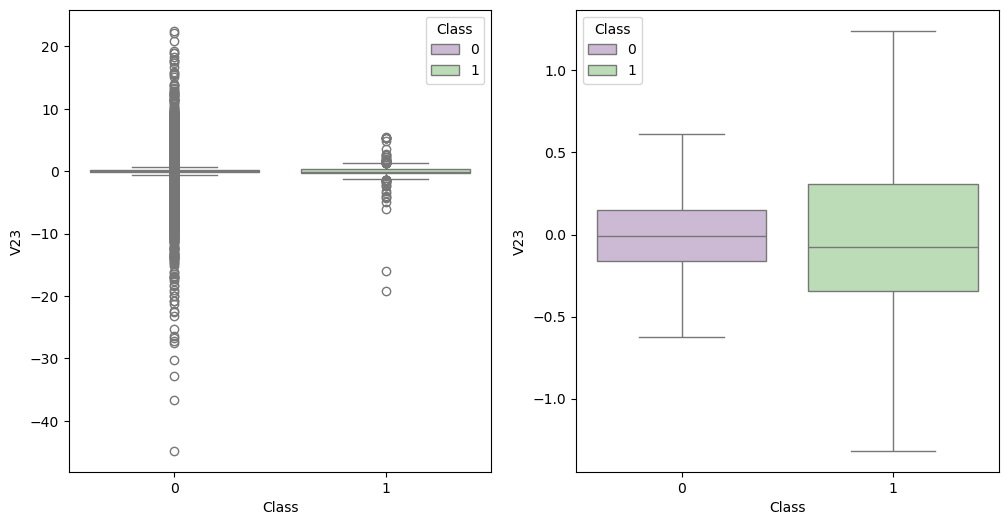

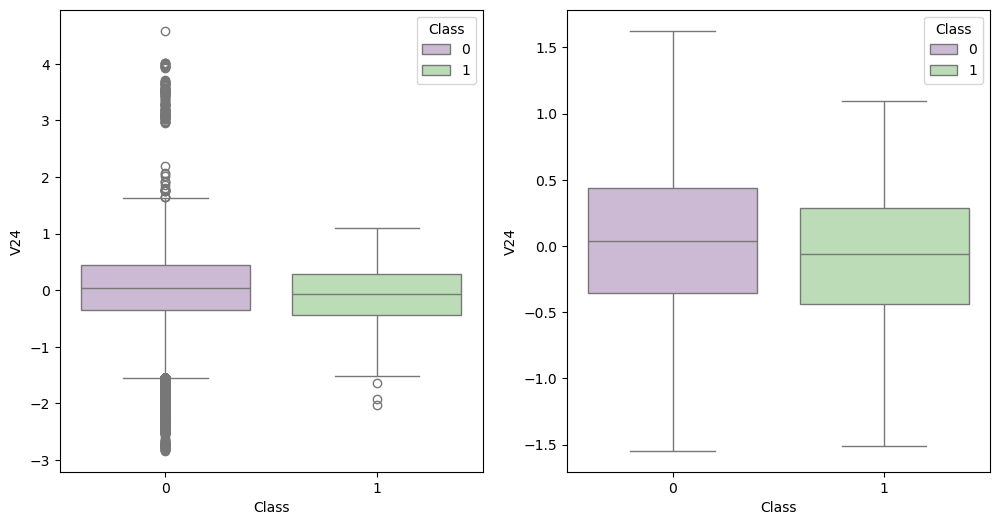

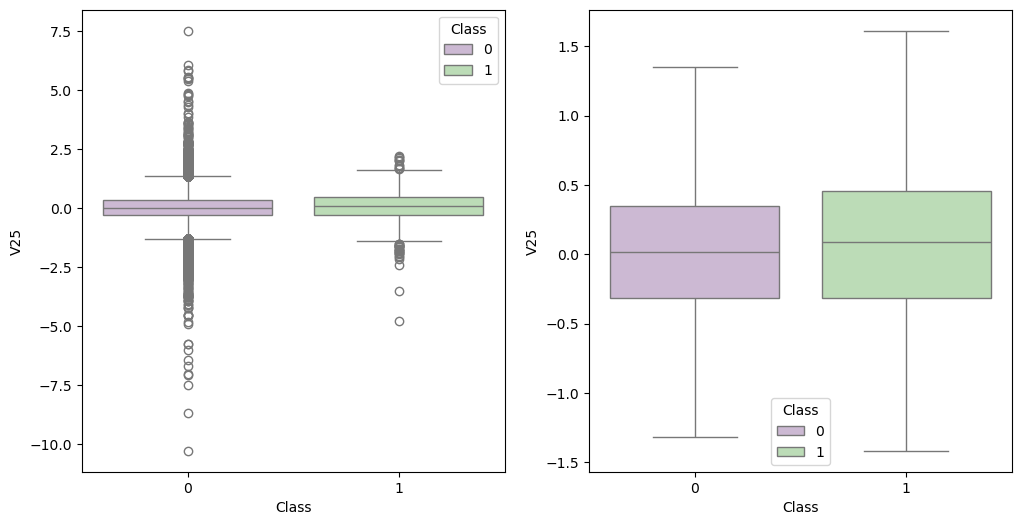

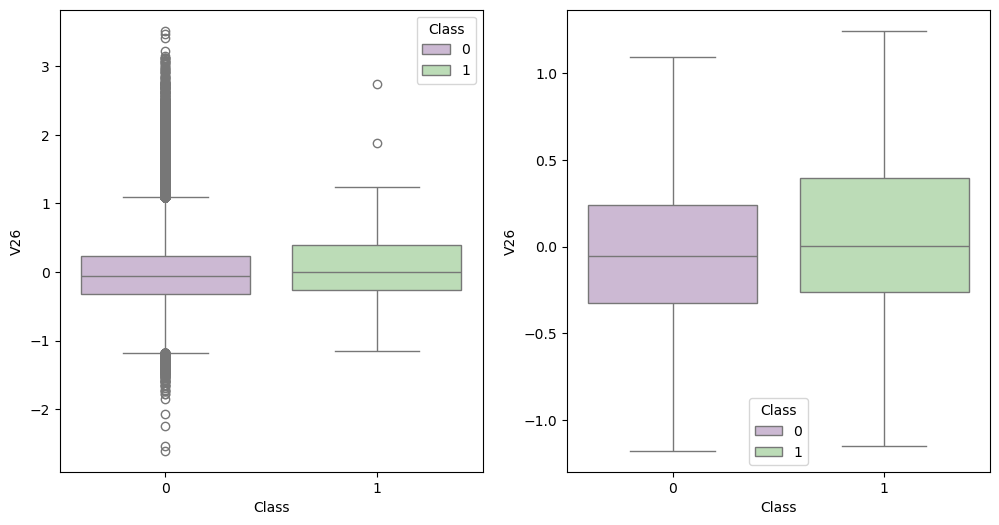

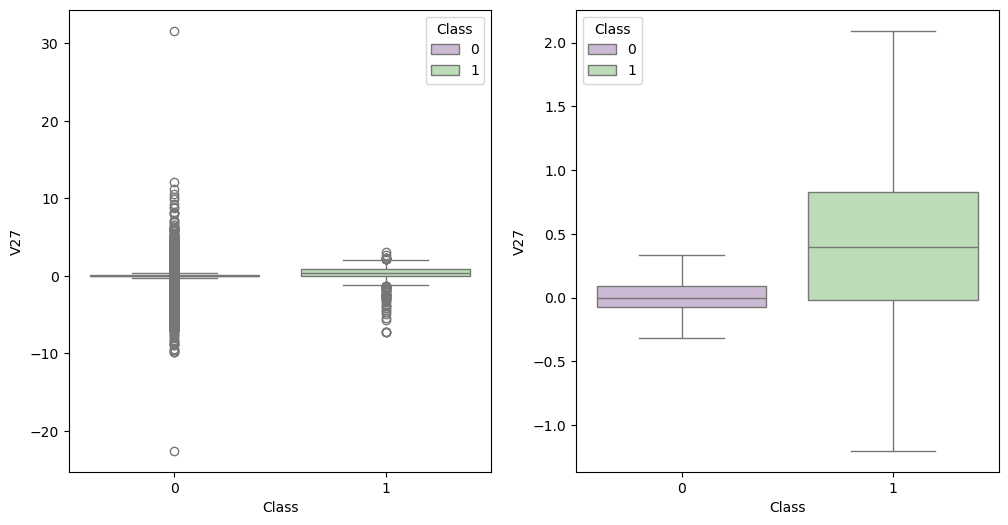

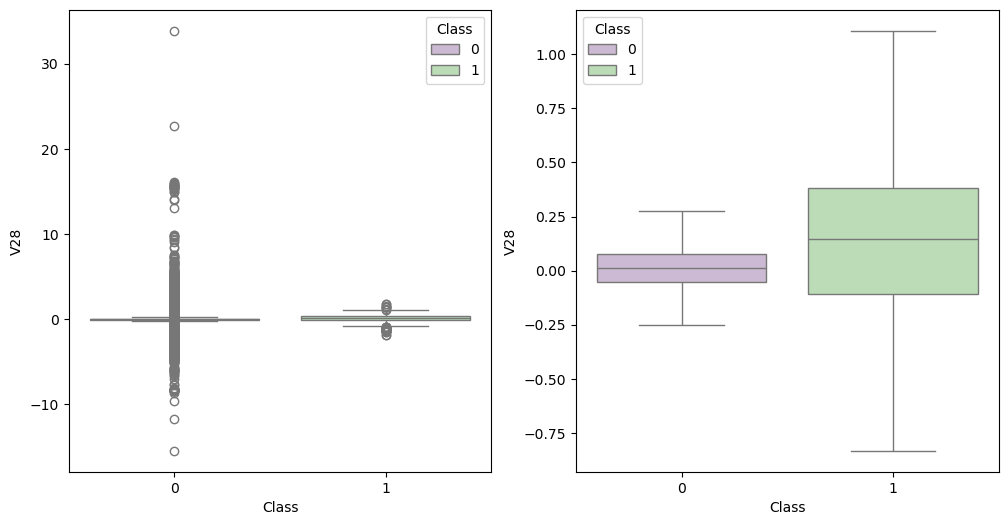

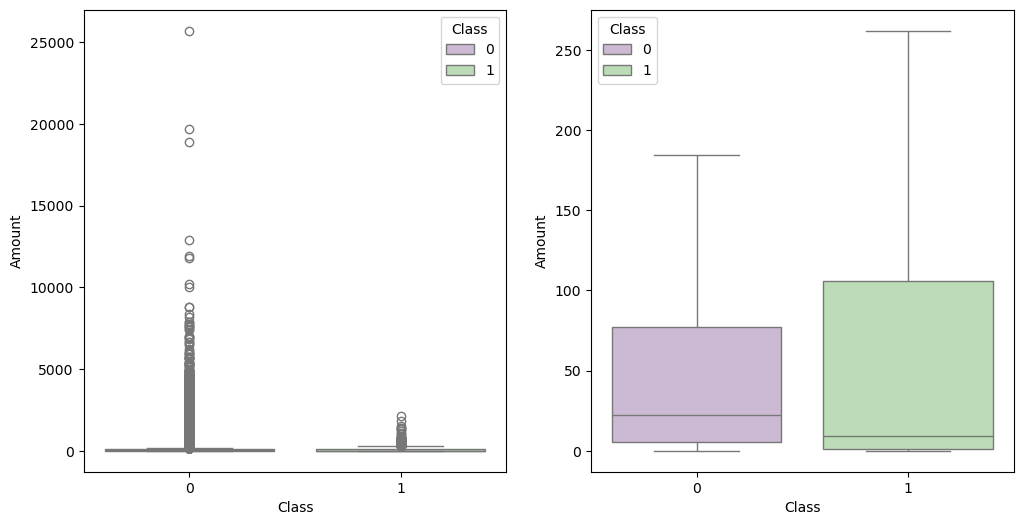

In [14]:
#OUTLIERS
#transaction amount

data=credit_card.copy()
data.drop(columns=['Class'],inplace=True)
for i in data.columns:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    s = sns.boxplot(ax = ax1, x="Class", y=i, hue="Class", data=credit_card, palette="PRGn",showfliers=True)
    s = sns.boxplot(ax = ax2, x="Class", y=i, hue="Class", data=credit_card, palette="PRGn",showfliers=False)
    plt.show();

<Figure size 640x480 with 0 Axes>

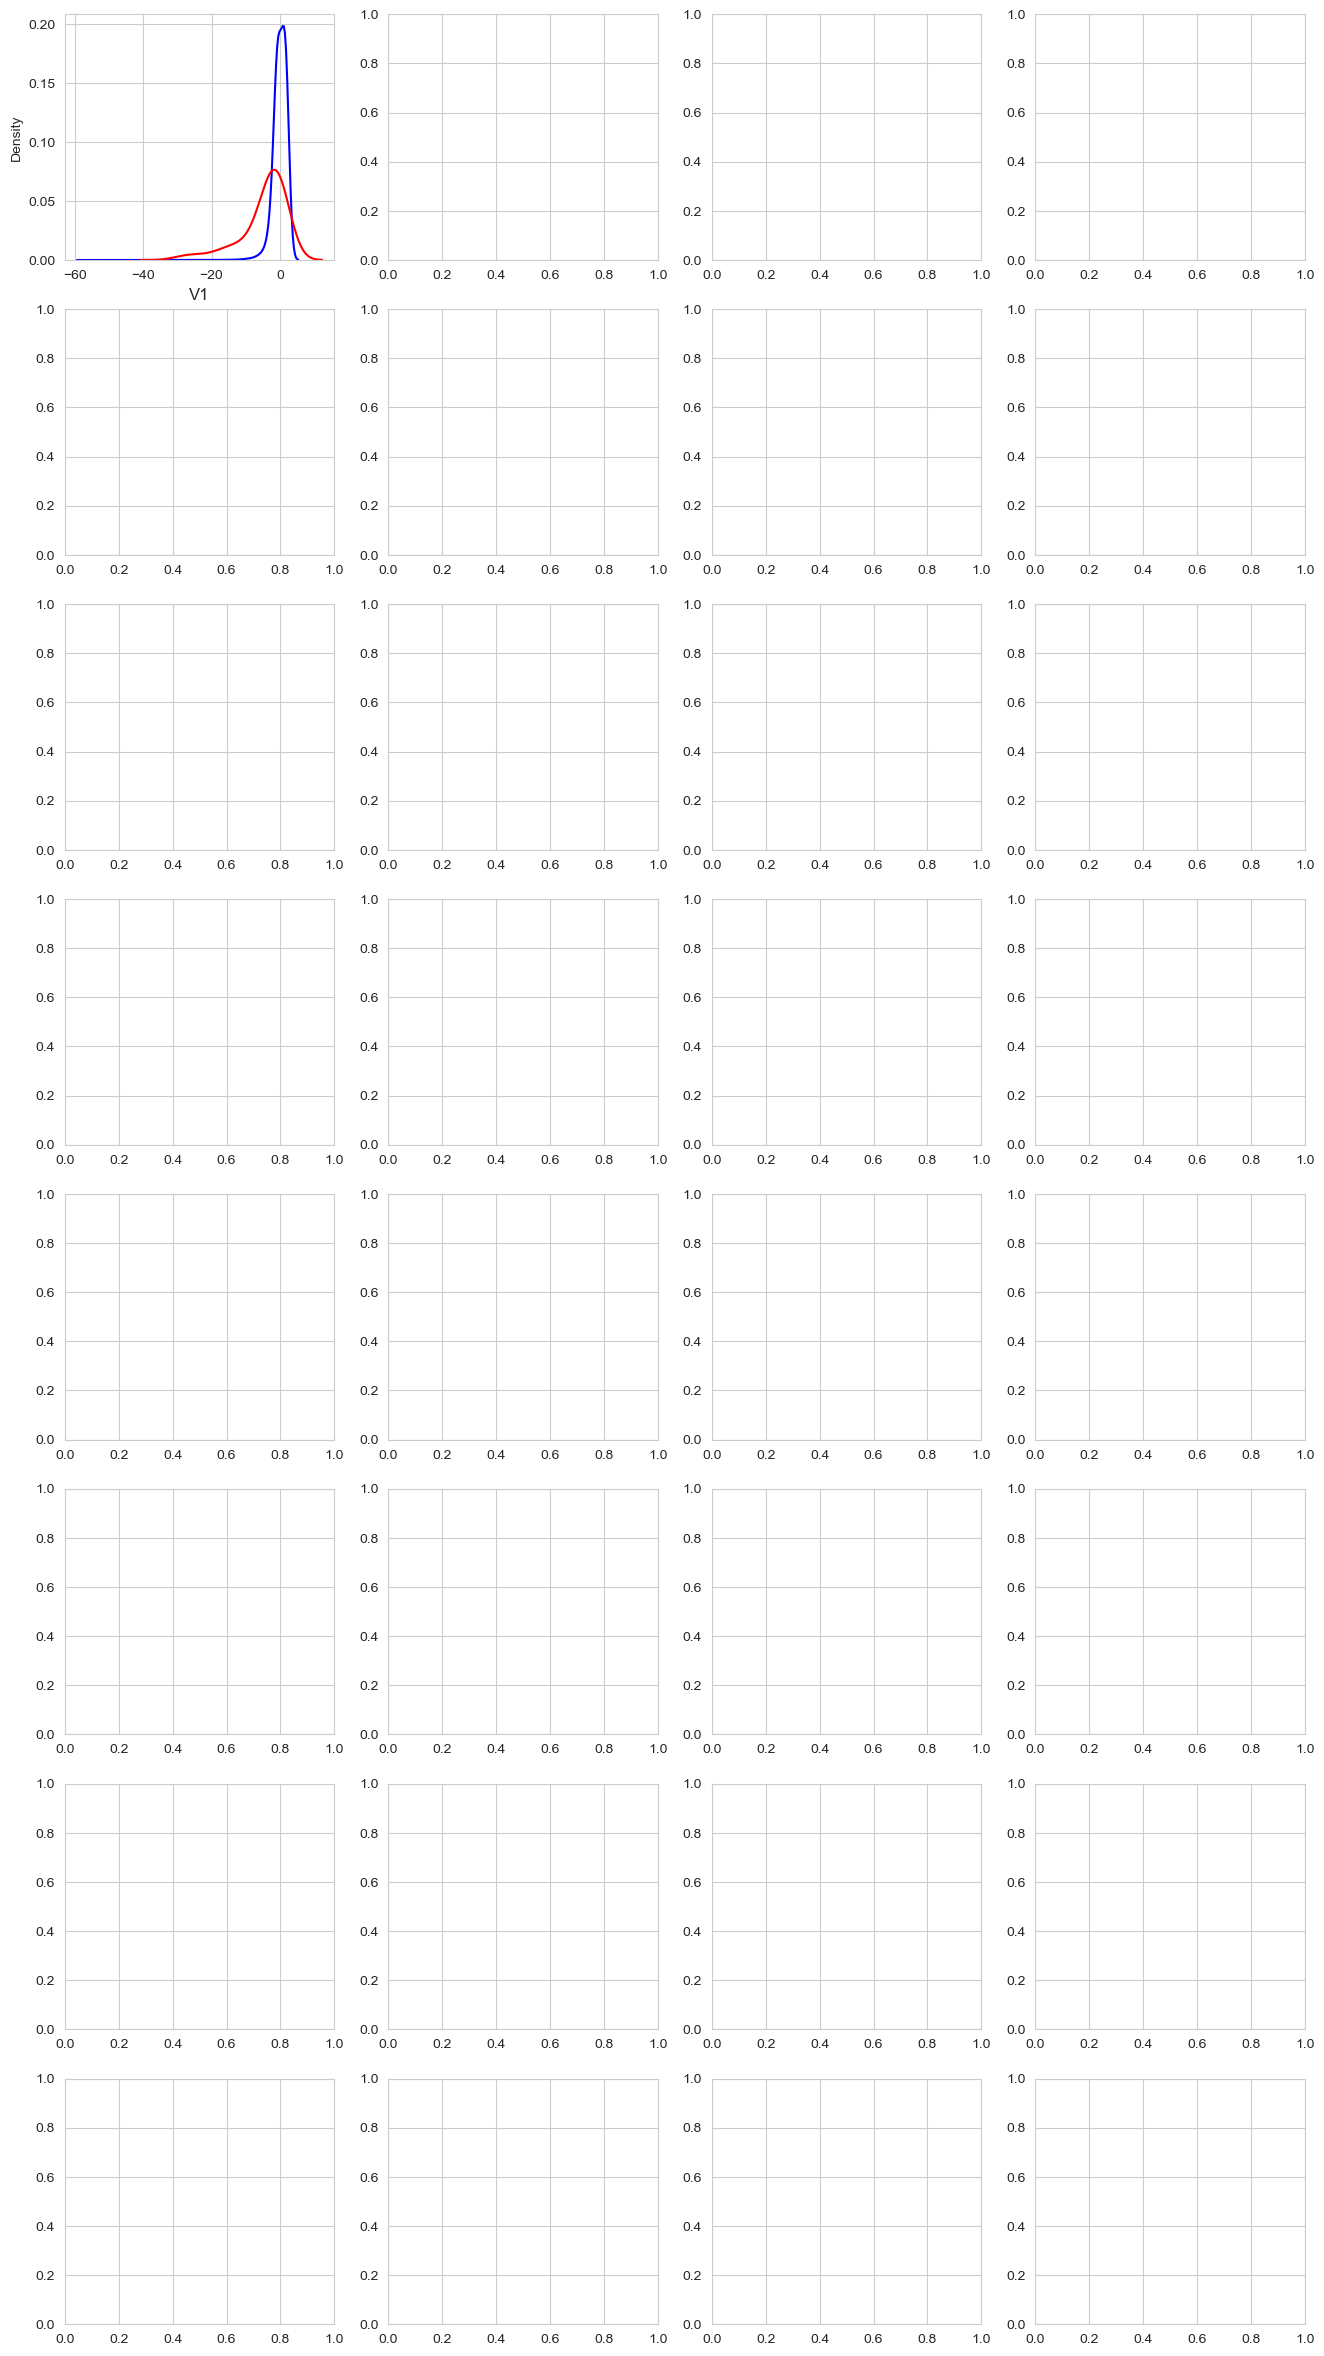

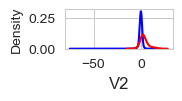

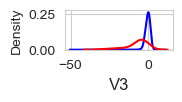

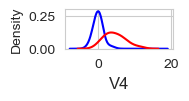

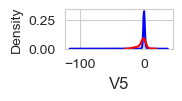

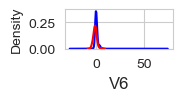

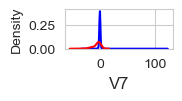

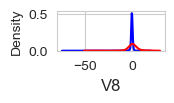

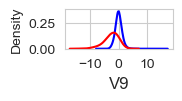

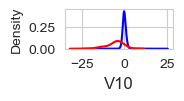

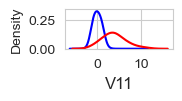

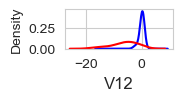

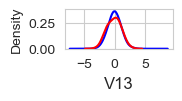

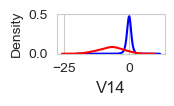

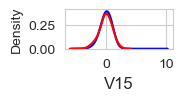

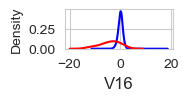

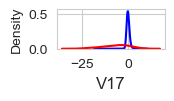

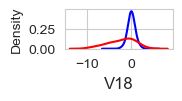

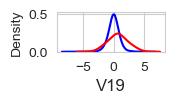

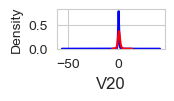

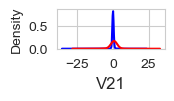

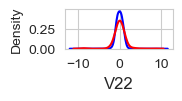

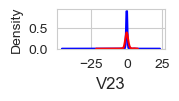

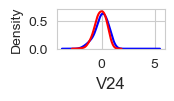

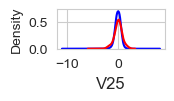

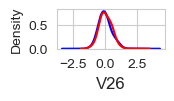

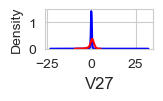

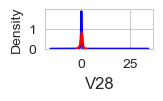

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your credit card data
credit_card = pd.read_csv("creditcard.csv") 

# features density plot

col = ['V1','V2','V3','V4','V5','V6','V7','V8','V9',
       'V10','V11','V12','V13','V14','V15','V16','V17','V18',
       'V19','V20','V21','V22','V23','V24','V25','V26','V27',
       'V28']

i = 0
t0 = credit_card.loc[credit_card["Class"]==0]
t1 = credit_card.loc[credit_card["Class"]==1]

sns.set_style('whitegrid')
plt.figure()
fig,ax = plt.subplots(8,4,figsize=(16,30))

for feature in col:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw_method=0.5,label="Class = 0", color='b')
    sns.kdeplot(t1[feature], bw_method=0.5,label="Class = 1", color='r')
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.show()

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

pca_vars = ['V%i'% k for k in range(1,19)]
plt.figure(figsize=(12,4),dpi=80)
sns.barplot(x=pca_vars, y=t0[pca_vars].skew(),color='darkgreen')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('V1-V28 Skewness for class 0')

Text(0.5, 1.0, 'V1-V28 Skewness for class 0')

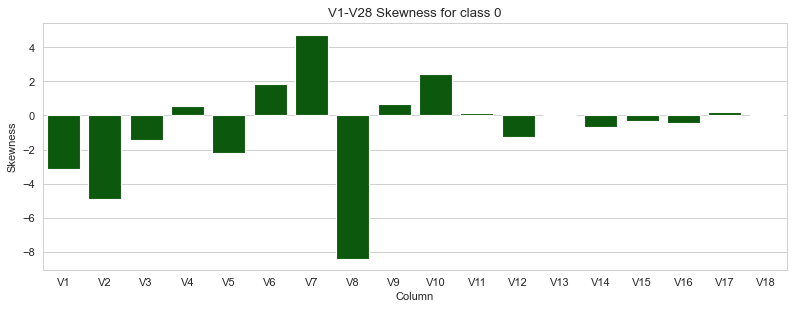

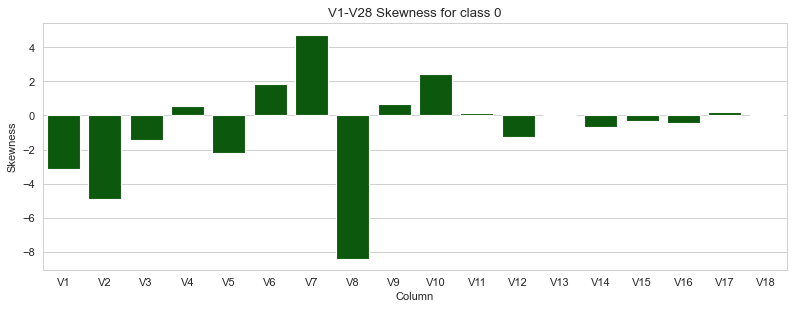

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

pca_vars = ['V%i'% k for k in range(1,19)]
plt.figure(figsize=(12,4),dpi=80)
sns.barplot(x=pca_vars, y=t0[pca_vars].skew(),color='darkgreen')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('V1-V28 Skewness for class 0')
plt.show()

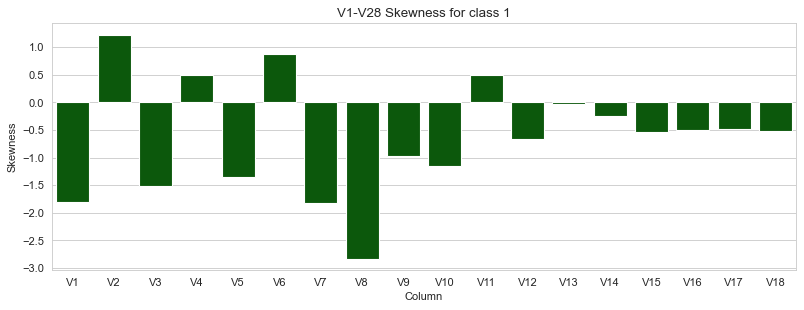

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,4),dpi=80)
sns.barplot(x=pca_vars, y=t1[pca_vars].skew(),color='darkgreen')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('V1-V28 Skewness for class 1')
plt.show()

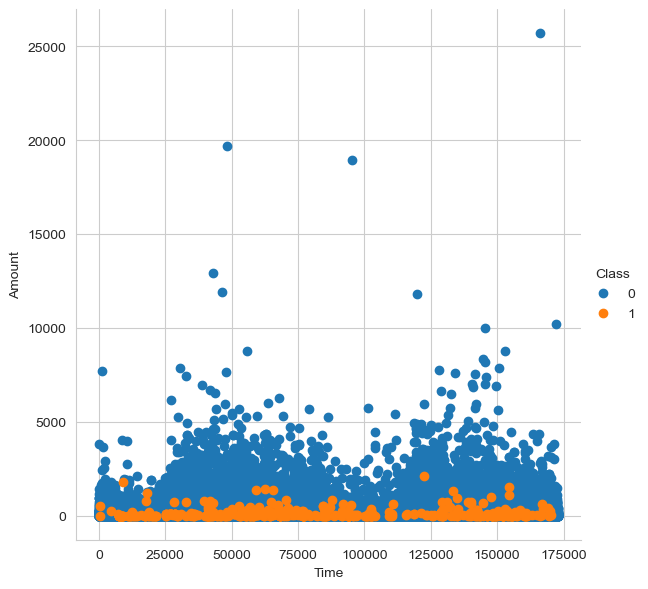

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.FacetGrid(credit_card, hue="Class", height = 6).map(plt.scatter,"Time","Amount").add_legend()
plt.show()

In [20]:
FilteredData = credit_card[['Amount','Class']]
countLess = FilteredData[FilteredData['Amount']<2000]
CountMore = credit_card.shape[0] - len(countLess)
percentage = round((len(countLess)/credit_card.shape[0])*100,2)
Class_1 = countLess[countLess['Class']==1]
print('Total number of transaction less than 2000 is{}'.format(len(countLess)))
print('Total number of transaction more than 2000 is{}'.format(CountMore))
print('{}%of transaction having less than amount 2000'.format(percentage))
print('{}%of fraud transaction in data where less than amount 2000'.format(len('Class_1')))
print('{} fraud transaction in data where less than amount 2000'.format(len('Class_1')))

Total number of transaction less than 2000 is284116
Total number of transaction more than 2000 is691
99.76%of transaction having less than amount 2000
7%of fraud transaction in data where less than amount 2000
7 fraud transaction in data where less than amount 2000


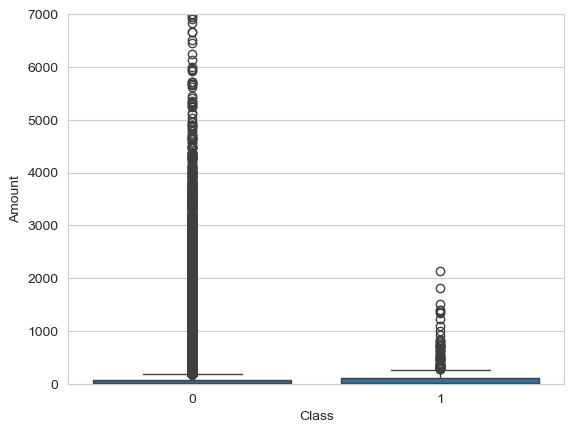

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

credit_card = pd.read_csv('creditcard.csv')

sns.boxplot(x = "Class", y = "Amount", data = credit_card)
plt.ylim(0,7000)
plt.show()

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler

credit_card = pd.read_csv('creditcard.csv')

data1 = credit_card.copy()
std_scaler = StandardScaler()
rb_scaler =  RobustScaler()

credit_card['scaled_Amount']= std_scaler.fit_transform(credit_card['Amount'].values.reshape(-1,1))

scaled_Amount = credit_card['scaled_Amount'] 

credit_card.drop(['scaled_Amount'],axis=1,inplace=True)
credit_card.insert(0,'scaled_Amount',scaled_Amount)
print(credit_card.head())

   scaled_Amount  Time        V1        V2        V3        V4        V5  \
0       0.244964   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1      -0.342475   0.0  1.191857  0.266151  0.166480  0.448154  0.060018   
2       1.160686   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3       0.140534   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4      -0.073403   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193   

         V6        V7        V8  ...       V21       V22       V23       V24  \
0  0.462388  0.239599  0.098698  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.082361 -0.078803  0.085102  ... -0.225775 -0.638672  0.101288 -0.339846   
2  1.800499  0.791461  0.247676  ...  0.247998  0.771679  0.909412 -0.689281   
3  1.247203  0.237609  0.377436  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.095921  0.592941 -0.270533  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  

In [23]:
import pandas as pd
import numpy as np
from scipy import stats

credit_card = pd.read_csv('creditcard.csv')

grouped_data = credit_card.groupby('Class')['Amount'] 

group1 = grouped_data.get_group(0).values
group2 = grouped_data.get_group(1).values

fvalue, pvalue = stats.f_oneway(group1, group2)

print("F-Statistics", fvalue)
print("p-value", pvalue)

F-Statistics 9.033344712018891
p-value 0.0026512206498171095


In [24]:
#Classifier Libraries

from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.svm import SVC

# from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn import metrics
from sklearn.metrics import make_scorer, precision_score, recall_score, confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

In [25]:
Classifier={
    "LogisticRegression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "BaggingClassifier": BaggingClassifier(n_estimators=10, random_state=0),
    "SGDClassifier": SGDClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "xgb": XGBClassifier()
}

In [26]:
def plot(df):
    fraud = df[df['Class']==1]
    normal = df[df['Class']==0]
    fraud.drop(['Class'],axis=1,inplace=True)
    normal.drop(['Class'],axis=1,inplace=True)
    fraud = fraud .set_index('classifier')
    normal = normal .set_index('classifier')
    plt.figure(figsize = (7,2))
    sns.heatmap(fraud.iloc[:,:],annot=True, cmap=sns.light_palette((210,90,60),input="husl"),linewidth=2)
    plt.title('Class1')
    plt.show()
    plt.figure(figsize = (7,2))
    sns.heatmap(normal.iloc[:,:],annot=True, cmap=sns.light_palette((210,90,60),input="husl"),linewidth=2)
    plt.title('Class0')
    plt.show()

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

def roc_curve(y_test,rdict):
    sns.set_style('whitegrid')
    plt.figure()
    i=0
    fig,ax = plt.subplots(4,2,figsize=(16,30))
    for key,val in rdict.tems():
        fpr, tpr, thresholds = metrics.roc_curve(y_test, val,
                                                 drop_intermediate = False)
        auc_score = metrics.roc_auc_score(y_test,val)
        i +=1
        plt.subplot(4,2,i)
        plt.plot( fpr, tpr, label='ROC curve(area = %0.2f)' % auc_score)
        plt.plot([0,1],[0,1],'k--')
        plt.xlim([0.0],[1.0])
        plt.ylim([0.0],[1.05])
        plt.xlable('False Positive Rate or [1-True Negative Rate]')
        plt.ylable('True Positive Rate')
        plt.title(key)
        plt.legend(loc='lower right')
        plt.show()

In [29]:
def training(models, x, y, x_t, y_t):
    conf = []
    comp = []
    rdict = {}
    for key, model in models.items():
        model = model.fit(x, y)
        y_pred = model.predict(x_t)
        rdict[key]= y_pred
        tn, fp, fn, tp = confusion_matrix(y_t, y_pred).ravel()
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_t, y_pred)
        r1 = {'Classifier':key, 'TN':tn, 'TP':tp, 'FN':fn, 'FP':fp}
        conf.append(r1)
        MCC = matthews_corrcoef(y_t, y_pred)
        AUROC = roc_auc_score(y_t, y_pred)
        Cohen_kappa = cohen_kappa_score(y_t, y_pred)
        accuracy = metrics.accuracy_score(y_t, y_pred)
        r2 ={'classifier':key,'matthews_corrcoef':MCC,'Cohen_kappa':Cohen_kappa,'accuracy':accuracy,'Auroc':AUROC,'precision':precision[0],'recall':recall}
        r3 ={'classifier':key,'matthews_corrcoef':MCC,'Cohen_kappa':Cohen_kappa,'accuracy':accuracy,'Auroc':AUROC,'precision':precision[1],'recall':recall}
        comp.append(r2)
        comp.append(r3)
    r11 = (pd.DataFrame(conf).to_markdown())
    r12 = pd.DataFrame(comp)
    print(f'\n\nRoc curve \n\n')
    roc_curve(y_t, rdict)
    print(f'\n\n confusion matrics comparison \n\n')
    print(r11)
    print(f'\n\n Performance comparison \n\n')
    plot(r12)

In [30]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

credit_card = pd.read_csv('creditcard.csv')

y = credit_card['Class']
x = credit_card.drop('Class',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

classifier = LogisticRegression()

def training(classifiers, x_train, y_train, x_test,y_test):
    classifier.fit(x_train,y_train)
    predictions = classifier.predict(x_test)
    print ("prediction for{y_train}:{'LogisticRegression'}")
    print(confusion_matrix(y_test,predictions))

training(classifier, x_train, y_train, x_test,y_test)

prediction for{y_train}:{'LogisticRegression'}
[[56832    32]
 [   34    64]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [31]:
import os
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

credit_card = pd.read_csv('creditcard.csv')

y = credit_card['Class']
x = credit_card.drop('Class', axis=1)


bestfeatures= SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns= pd.DataFrame(x.columns)

# Concat 2 different dataframe to better visualization

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['V','Board']
featureScores_df = featureScores.sort_values(['V','Board'],ascending=[False, True])
featureScores_df = featureScores_df.set_index('Board')
print(featureScores_df)

                   V
Board               
2746.600273       V9
112.548287        V8
10349.605408      V7
543.510578        V6
2592.357929       V5
5163.832114       V4
11014.508305      V3
25.901405        V28
88.045296        V27
5.653653         V26
3.116062         V25
14.850932        V24
2.053476         V23
0.184706         V22
465.916251       V21
114.999731       V20
2393.401678       V2
344.990997       V19
3584.380605      V18
33979.168593     V17
11443.349428     V16
5.080193         V15
28695.547788     V14
5.947672         V13
20749.822361     V12
6999.355047      V11
14057.979985     V10
2955.668946       V1
43.252998       Time
9.033345      Amount


In [32]:
import os
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

credit_card = pd.read_csv('creditcard.csv')

y = credit_card['Class']
x = credit_card.drop('Class', axis=1)


bestfeatures= SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns= pd.DataFrame(x.columns)

# Concat 2 different dataframe to better visualization

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['V','Board']
featureScores_df = featureScores.sort_values(['V','Board'],ascending=[False, True])
featureScores_df = featureScores_df.set_index('Board').head(10)
print(featureScores_df)

                V
Board            
2746.600273    V9
112.548287     V8
10349.605408   V7
543.510578     V6
2592.357929    V5
5163.832114    V4
11014.508305   V3
25.901405     V28
88.045296     V27
5.653653      V26


In [33]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

credit_card = pd.read_csv('creditcard.csv')

y = credit_card['Class']
x = credit_card.drop('Class',axis=1)

col = x.columns.tolist()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

xgb = XGBClassifier()

xgb.fit(x_train[col],y_train)
y_pred_final = xgb.predict(x_test[col])

In [34]:
import joblib
from xgboost import XGBClassifier

joblib.dump(xgb,'final.pkl'),
clf = joblib.load('final.pkl'),
clf

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),)

In [35]:
import h5py

credit_card = pd.read_csv('creditcard.csv')

with h5py.File('model.h5', 'w') as f:
       f.create_dataset('credit_card', data=credit_card)

with h5py.File('model.h5', 'r') as f:
       loaded_model_data = f['credit_card'][:] 

In [36]:
import joblib
import h5py

joblib.dump(credit_card,'final.h5'),
clf = joblib.load('final.h5'),
clf

(            Time         V1         V2        V3        V4        V5  \
 0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
 1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
 2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
 3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
 4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
 ...          ...        ...        ...       ...       ...       ...   
 284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
 284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
 284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
 284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
 284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   
 
               V6        V7        V8        V9  ...       V21       V22  \
 0       0.462388  0.239599  0.098698  0.36378